# Course : MACHINE LEARNING (DSCI 6003-01)
# Project Title : Chatbot Recommending Products Based on Visual Similarity


### Import necessary libraries

In [564]:
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow.keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import pickle
import pandas as pd
import numpy as np
from PIL import Image
import requests
from io import BytesIO
from concurrent.futures import ProcessPoolExecutor
from sklearn.model_selection import train_test_split
import cv2
from sklearn.manifold import TSNE
import joblib
#For model training
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras import layers


In [2]:
# Load the csv data with images url
df = pd.read_csv('/Users/jyotibhandari/Documents/Machine Learning /Project/flipkart_com-ecommerce_sample.csv')

df

uniq_id            crawl_timestamp  \
0      c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1      7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2      f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3      0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4      bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   
...                                 ...                        ...   
19995  7179d2f6c4ad50a17d014ca1d2815156  2015-12-01 10:15:43 +0000   
19996  71ac419198359d37b8fe5e3fffdfee09  2015-12-01 10:15:43 +0000   
19997  93e9d343837400ce0d7980874ece471c  2015-12-01 10:15:43 +0000   
19998  669e79b8fa5d9ae020841c0c97d5e935  2015-12-01 10:15:43 +0000   
19999  cb4fa87a874f715fff567f7b7b3be79c  2015-12-01 10:15:43 +0000   

                                             product_url  \
0      http://www.flipkart.com/alisha-solid-women-s-c...   
1      http://www.flipkart.com/fabhomedecor-fabric-do...   
2      http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
3      http://www.flipkart.com/alisha-solid-women-s-c...   
4      http://www.flipkart.com/sicons-all-purpose-arn...   
...                                                  ...   
19995  http://www.flipkart.com/walldesign-small-vinyl...   
19996  http://www.flipkart.com/wallmantra-large-vinyl...   
19997  http://www.flipkart.com/elite-collection-mediu...   
19998  http://www.flipkart.com/elite-collection-mediu...   
19999  http://www.flipkart.com/elite-collection-mediu...   

                                  product_name  \
0          Alisha Solid Women's Cycling Shorts   
1          FabHomeDecor Fabric Double Sofa Bed   
2                                   AW Bellies   
3          Alisha Solid Women's Cycling Shorts   
4        Sicons All Purpose Arnica Dog Shampoo   
...                                        ...   
19995           WallDesign Small Vinyl Sticker   
19996  Wallmantra Large Vinyl Stickers Sticker   
19997  Elite Collection Medium Acrylic Sticker   
19998  Elite Collection Medium Acrylic Sticker   
19999  Elite Collection Medium Acrylic Sticker   

                                   product_category_tree               pid  \
0      ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2FF9KEDEFGF   
1      ["Furniture >> Living Room Furniture >> Sofa B...  SBEEH3QGU7MFYJFY   
2      ["Footwear >> Women's Footwear >> Ballerinas >...  SHOEH4GRSUBJGZXE   
3      ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2F6HUZMQ6SJ   
4      ["Pet Supplies >> Grooming >> Skin & Coat Care...  PSOEH3ZYDMSYARJ5   
...                                                  ...               ...   
19995  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE7KFJAKSTDY9G   
19996  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE9F5URNQGJCGH   
19997  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE7VAYDKQZEBSD   
19998  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE8YSVEPPCZ42Y   
19999  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88KN9ZDSGZKY   

       retail_price  discounted_price  \
0             999.0             379.0   
1           32157.0           22646.0   
2             999.0             499.0   
3             699.0             267.0   
4             220.0             210.0   
...             ...               ...   
19995        1500.0             730.0   
19996        1429.0            1143.0   
19997        1299.0             999.0   
19998        1499.0            1199.0   
19999        1499.0             999.0   

                                                   image  \
0      ["http://img5a.flixcart.com/image/short/u/4/a/...   
1      ["http://img6a.flixcart.com/image/sofa-bed/j/f...   
2      ["http://img5a.flixcart.com/image/shoe/7/z/z/r...   
3      ["http://img5a.flixcart.com/image/short/6/2/h/...   
4      ["http://img5a.flixcart.com/image/pet-shampoo/...   
...                                                  ...   
19995  ["http://img

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [4]:
df['image'].unique()

array(['["http://img5a.flixcart.com/image/short/u/4/a/altht-3p-21-alisha-38-original-imaeh2d5vm5zbtgg.jpeg", "http://img5a.flixcart.com/image/short/p/j/z/altght4p-26-alisha-38-original-imaeh2d5kbufss6n.jpeg", "http://img5a.flixcart.com/image/short/p/j/z/altght4p-26-alisha-38-original-imaeh2d5npdybzyt.jpeg", "http://img5a.flixcart.com/image/short/z/j/7/altght-7-alisha-38-original-imaeh2d5jsz2ghd6.jpeg"]',
       '["http://img6a.flixcart.com/image/sofa-bed/j/f/y/fhd112-double-foam-fabhomedecor-leatherette-black-leatherette-1100x1100-imaeh3gemjjcg9ta.jpeg", "http://img6a.flixcart.com/image/sofa-bed/j/f/y/fhd112-double-foam-fabhomedecor-leatherette-black-leatherette-original-imaeh3gemjjcg9ta.jpeg", "http://img6a.flixcart.com/image/sofa-bed/j/f/y/fhd112-double-foam-fabhomedecor-leatherette-black-leatherette-original-imaeh3genfxkqvuv.jpeg", "http://img5a.flixcart.com/image/sofa-bed/j/f/y/fhd112-double-foam-fabhomedecor-leatherette-black-leatherette-original-imaeh3ge2sfeczef.jpeg", "http://im

In [5]:
def get_clean_image_url(df):
    try:
        imagesurls = df['image'].replace('["','').replace('"]','').split('", "')
        image = imagesurls[0]
        return image
    except:
        return None

# Get all image url , clean it and store the url in a new column
imagurl = df.apply(lambda x:get_clean_image_url(x), axis=1)
df['image_url'] = imageurl

In [6]:
df['image_url']

0        http://img5a.flixcart.com/image/short/u/4/a/al...
1        http://img6a.flixcart.com/image/sofa-bed/j/f/y...
2        http://img5a.flixcart.com/image/shoe/7/z/z/red...
3        http://img5a.flixcart.com/image/short/6/2/h/al...
4        http://img5a.flixcart.com/image/pet-shampoo/r/...
                               ...                        
19995    http://img6a.flixcart.com/image/wall-decoratio...
19996    http://img6a.flixcart.com/image/sticker/z/g/s/...
19997    http://img5a.flixcart.com/image/sticker/b/s/d/...
19998    http://img5a.flixcart.com/image/sticker/4/2/y/...
19999    http://img6a.flixcart.com/image/sticker/z/k/y/...
Name: image_url, Length: 20000, dtype: object

### get image_from_url file having image_from_url function
* make a python file get_image_from_url and put this function get_image_from_url in the python file. 
* We need to import this function from the file.

In [1]:
### get image_from_url file having image_from_url function
### make a python file get_image_from_url and put this function get_image_from_url in the python file. 
# We need to import this function from the file.


def get_image_from_url(uniq_id,name,category,url):
    try:
    # Image
        import requests
        import pandas as pd
        import numpy as np
        from PIL import Image
        import requests
        from io import BytesIO
        from concurrent.futures import ProcessPoolExecutor
        import json
        import uuid
        from tqdm import tqdm_notebook as tqdm
        response = requests.get(url)
        print(response)
        img = Image.open(BytesIO(response.content))
        img = img.resize((250, 250), Image.ANTIALIAS)
        img.save('/Users/jyotibhandari/Documents/Machine Learning /Project/FlipkartProductsData/{}.jpg'.format(uniq_id))
    except:
        print('fail: {}'.format(url))
        pass 

In [1065]:
from get_image_from_url import get_image_from_url
if __name__ ==  '__main__': 
    with ProcessPoolExecutor(max_workers = None) as executor:
            results = list(tqdm(executor.map(get_image_from_url,
                                             df.uniq_id.values,
                                             df.product_name.values,
                                             df.product_category_tree.values,
                                             df.image_url.values),
                        total = len(df)))


/var/folders/2l/62z8hzq17zdcn66qy8xy_jp00000gn/T/ipykernel_3698/3297687348.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  results = list(tqdm(executor.map(get_image_from_url,


  0%|          | 0/20000 [00:00<?, ?it/s]

<Response [200]>
fail: http://img6a.flixcart.com/image/sofa-bed/e/x/n/fhd107-double-foam-fabhomedecor-brown-brown-1100x1100-imaeh3geypmfrc5a.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/short/5/z/c/altght4p-39-alisha-38-original-imaeh2d5ar6m55zd.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sofa-bed/j/6/q/fhd115-double-foam-fabhomedecor-dark-brown-dark-brown-original-imaeh3gee5zcazvm.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/vanity-box/8/5/t/j-635-bulaky-vanity-case-1100x1100-imadzy6atzfswnag.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/waistcoat/v/z/6/lkod112-kajci-free-original-imaefwvnru9yxeee.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/wire-joint-connector/n/r/f/bnc-057-rapter-100-1100x1100-imaehffvdkwk4jzh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sensor-security-system/f/f/y/pir-wireless-motion-sensor-four-switch-control-buildtrack-original-imaehdg6h6zajg7w.jpeg
<Response [200]>
fail: 

<Response [200]>
fail: http://img6a.flixcart.com/image/short/p/j/z/altght4p-26-alisha-38-original-imaeh2d5cqtxe5gt.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/short/t/p/b/altht-3p-2-alisha-38-original-imaeh2d53jbrxnam.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/short/m/g/y/altht-3p-18-alisha-34-original-imaeh2d5zgnh6vsb.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cargo/n/g/h/cargo-38-green-madcaps-34-original-imae5qgvt3fhqq33.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/diary-notebook/6/j/u/tiara-diaries-244-original-imaej4qrfnczpn8k.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sun-shade/5/2/y/pp48-car-magnetic-himmlisch-1100x1100-imaegujvyzrc8eh6.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/kurta/f/c/4/vnku004389-beige-pink-vishudh-xl-original-imaehdjtwsnkgzvy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/kurta/9/s/y/vnku004374-black-grey-vishudh-xxl-original-imaehdjrh2xqguvh.jpe

<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/7/z/z/red-as-454-aw-11-original-imaeebfwsdf6jdf6.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/s/g/m/black-r998-22-ladela-38-original-imaega8phqh6tf4e.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pet-toy/n/a/r/a35-kennel-original-imaea5c3qxyqzrgz.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/fabric/h/k/a/r-c-lehe-bt-indcrown-1000x1000-imaejbczsqzjrbfd.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/packaging-security-bag/6/y/q/8-x-10-inches-security-bags-without-pod-jacket-courier-bag-1100x1100-imaegbjpxtthuyzc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/showpiece-figurine/r/y/y/osk60-om-shivakriti-original-imaehpu5jajh93bu.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/wire-joint-connector/h/s/e/bnc-048-rapter-64-1100x1100-imaehffvf7nm3hrc.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cardigan/e/q/2/1-1-872907-roadster-m-ori

<Response [200]>
fail: http://img5a.flixcart.com/image/paper-weight/u/e/3/eternal-gandhi-gandhi-paper-weight-mark-v-1100x1100-imaeb8adyf3xmqhf.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bottle/j/m/m/av004bgr-freelance-350-vacuum-bottles-1000x1000-imaegykdk6ytzrzz.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sofa-bed/r/c/g/fhd132-double-foam-fabhomedecor-purple-purple-1100x1100-imaeh3getyhdnnxn.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sandal/h/7/v/brown-white17-swagga0040-swagga-47-original-imaeh6zhxgymnwjx.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/lingerie-set/5/a/y/gp2151itu-glus-30b-original-imae92gzdcyhz9kr.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/artificial-plant/g/s/n/bbajc218-bengal-blooms-original-imaeg8ety3zfcnvw.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/waistcoat/d/z/y/tl-012-pick-pocket-xxl-original-imaefurn2xrqf4ef.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/im

<Response [200]>
fail: http://img5a.flixcart.com/image/short/u/4/a/altht-3p-21-alisha-38-original-imaeh2d5vm5zbtgg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/pet-shampoo/c/c/d/sh-df-07-sicons-200-1100x1100-imaeh3kvn25fznjt.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/p/f/h/black-sfwf0377-style-foot-44-original-imaeh4cxasyrdtjr.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/diary-notebook/g/y/y/shopmania-nb00664-1100x1100-imaej4wguh2c6dfb.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/g/6/e/red-1216-nuride-41-original-imaedsa82yrz5hxu.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/kurta/y/h/j/vnku004371-rust-teal-vishudh-m-original-imaehdjsbfyfx5br.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/kurta/8/w/p/vnku004372-purple-plum-vishudh-xxl-original-imaehdjswwnuh7ph.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/kurta/j/t/d/m002pcotpinrain-masara-l-original-imaeheqbxzdbygke.jpeg
<R

<Response [200]>
fail: http://img5a.flixcart.com/image/pet-shampoo/r/j/5/sh-df-14-sicons-500-1100x1100-imaeh3hfvav85tva.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/b/p/n/pink-200db202-dilli-bazaaar-10-original-imaeh2zz4x6hnuwf.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/t-shirt/w/x/t/dlhbb445-beige-black-gyellow-purple-dongli-10-11-years-original-imaehb54gxhchxcd.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/kurta/6/f/e/m001pcotsearain-masara-m-original-imaeheqbtkykajsx.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pad/a/x/v/eg101-hrs-elbow-pads-ultimate-boy-1100x1100-imaehqhgsbwhu4hm.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bedsheet/w/q/u/jaipur117-jaipur-print-flat-jaipur117-original-imaejfv5fzysgpfy.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/watch/q/g/a/colat-mw20-colat-1100x1360-imae2ruyqehpbzde.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/7/5/v/br-rialto-a1027-r

<Response [200]>
fail: http://img5a.flixcart.com/image/short/6/2/h/altght-11-alisha-38-original-imaeh2d5uq9thnyg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/swimsuit/5/v/9/carrel-sw-3091-black-white01-carrel-4xl-original-imaehyzm2sywfavb.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/swimsuit/g/z/j/carrel-sw-3091-darkblue-white-carrel-4xl-original-imaehyzmk8hphgua.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/legging-jegging/f/c/7/1-1-lg-green08-fdt-xl-original-imae58jpwqj5gh5e.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/pouch-potli/u/x/v/aelkabj01224-a-angelfish-potli-silk-potali-original-imaeeprygdj223es.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sensor-security-system/p/f/9/summersible-single-phase-pump-controller-skayvon-original-imaehdu4e8e2nhmh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/kurta/6/f/e/m001pcotsearain-masara-m-original-imaeheqbtkykajsx.jpeg
<Response [200]>
fail: http://img6a

<Response [200]>
fail: http://img6a.flixcart.com/image/sofa-bed/j/f/y/fhd112-double-foam-fabhomedecor-leatherette-black-leatherette-1100x1100-imaeh3gemjjcg9ta.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/short/q/z/v/altht-3p-17-alisha-36-original-imaeh2d5njykvkz6.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/pet-shampoo/v/x/m/sh-df-02-sicons-200-1100x1100-imaeh3kjba4htqfg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/skate/w/y/7/ve-ar-2132-w-4-5-1-veelys-quad-roller-shiny-white-original-imae5jpf8c5nmxfy.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/diary-notebook/e/g/h/shopmania-nb00678-1100x1100-imaej4whhbgzn5z3.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/dungaree-romper/9/z/d/bpr0015-oye-1-2-years-original-imaeeyu6ashttgyv.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/kurta/s/c/g/vnku004370-pink-olive-vishudh-xxl-original-imaehdjsyzzfv6rj.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/

fail: http://img5a.flixcart.com/image/mug/h/d/s/1-akup-life-is-not-living-1100x1100-imaegtzgzf7vt9jp.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/mug/2/c/h/1-akup-i-love-stories-1100x1100-imaegtmkeyky2b5r.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/short/m/6/a/cswiw-cmb3-shr-100-99-98-mynte-l-original-imaeeg4ktzjhphvn.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/c/s/s/acn-cd-59-2-5-aadyaa-collections-2-original-imaef4ezkaxwtrw9.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/wheel-tire-cleaner/r/q/g/mn-110-mount-nano-250-1100x1100-imaegdvcjqv9czj4.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/c/w/k/gk9937-tab91-3xl-original-imaeg3qbev3ecuy4.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/y/z/g/top2016-blk-esoft-l-original-imaefjru3phxufjf.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-charger/p/4/c/tos-micromax-canvas-doodle-4-q391-8881-original-imaedthfzc

fail: http://img5a.flixcart.com/image/watch-box/7/g/4/adwb0000139-5-anno-dominii-adwb0000139-1100x1100-imaeggyhcphfr59f.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sport-glove/e/p/p/right-400-wolfer-9-5-batting-gloves-player-edition-right-hand-xl-original-imaeea6vgnwsgtda.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/keyboard/tablet-keyboard/h/v/d/cm-key-354-original-imadvfhjghvzcgdw.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/dress/4/8/q/gcwf207-abony-l-original-imaehdkvngbeerru.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/usb-gadget/b/x/b/portable-1024-jrb-original-imaejgwyededybzp.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/legging-jegging/z/f/y/indi05comb66-medha-m-original-imaebyrjxmshmk9y.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sock/j/a/5/g-mode-free-original-imaejzsm5jzqnj4r.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/camera-battery-charger/battery-charger/d/g/f/uniro

fail: http://img5a.flixcart.com/image/battery-charger/4/g/z/oasis-wallcharger-g-19-1100x1100-imaehrmgwrd4erqc.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/dress/3/q/d/la16010825-la-attire-s-original-imaehh9hagkvtcrc.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/slipper-flip-flop/u/x/p/multi-190-corona-7-1000x1000-imaegwpa36fzfhng.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sock/y/x/4/a-mode-free-original-imaejzsgv9k4eefc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/panty/w/y/b/sap039-damini-roma-fabiya-l-original-imaejzy2vdnsvr4j.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/panty/r/9/m/sap040-rani-rani-fabiya-m-original-imaejzy29vxeky3e.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/legging-jegging/6/g/g/indi05comb35-medha-l-original-imaebyrmpcqpg8dr.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/v/p/w/ts1001-ny-burdy-40-original-imaejk85svuwe74q.jpeg
<Response [200]>
fail: http

fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/s/q/w/pinkrose-bg-171-free-size-pink-rose-1-original-imaeggffmcjcyvnq.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/top/j/y/e/top2012-red-blk-esoft-xl-original-imaefjrubwdf4fun.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/e/t/8/multicolor-s28-deep-fashion-41-1000x1000-imaegabzmxq5d4yv.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/top/v/y/j/l-157f-c1-maro-06-meril-xl-original-imaegez3myj8x5vt.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/m/s/p/red-cv-fcs-red-lovely-chick-41-original-imaegyazm7jhrjrv.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-charger/p/4/c/tos-micromax-canvas-doodle-4-q391-8881-original-imaedthfzcwhebvh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-cover/d/g/s/27103-galaxy-1100x1100-imae8q5hy6yvgtg3.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/vanity-box/c/q/t/vanity-box-krg-enterprises-denes

fail: http://img6a.flixcart.com/image/router/h/p/e/d-link-dap1320-1100x1100-imaegg3f9gjy2rkt.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/short/x/h/m/cswiw-cmb3-shr-100-99-96-mynte-l-original-imaeeg4khe5kfufn.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/conditioner/c/e/q/paul-mitchell-75-tea-tree-lavender-mint-moisturizing-unisex-1100x1100-imaeeba6edvgyayg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/f/v/t/brown-t-s539bk-brandtrendz-10-original-imaeg32cpgqhef5h.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/y/m/h/stvaus18blu-indricka-l-1000x1000-imaegbecj3zfh4wh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bangle-bracelet-armlet/b/f/f/rudraksh-golden-bracelet-2-5-herbal-jewellery-1-original-imaegfwjebhug3bp.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/solar-charge-controller/n/j/4/cx10-phocos-1100x1100-imaegdhdqfvr6uwc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/g/h/v/kr

fail: http://img5a.flixcart.com/image/top/h/z/m/gk9936-tab91-xxl-original-imaeg3qbn6vuq5km.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-charger/p/4/c/tos-micromax-canvas-doodle-4-q391-8881-original-imaedthfzcwhebvh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/v/z/d/magnificent-black-marvelous-brown-mc-570-csbs-sale-7-original-imaefueuvjh5pb3t.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/k/w/m/1305977-free-size-bgs-1-1100x1100-imaeggxdwjy4pw2g.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/p/k/x/gk9947-tab91-3xl-original-imaeg3svwhfbnqzu.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-charger/p/4/c/tos-micromax-canvas-doodle-4-q391-8881-original-imaedthfzcwhebvh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/casserole/z/v/g/ech1-cookart-original-imaej4nfay3fnvpx.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/slipper-flip-flop/z/6/v/multi-173-corona-5-10

fail: http://img5a.flixcart.com/image/camera-mount/d/2/v/wrist-strap-band-extension-for-gopro-hero-2-hero3-hero3-sd-1100x1100-imaejj5z5jjmtzxt.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/5/j/6/continental-beige107-crokrok-imported-continental-beige-glossy-original-imaejr29d55xtjfv.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/vehicle-light-bulb/c/n/g/bwt526-with-flashing-red-colour-bike-world-1100x1100-imaegpft7tzygahs.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/vehicle-light-bulb/c/n/g/bwt526-with-flashing-red-colour-bike-world-1100x1100-imaegpft7tzygahs.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/combo-kit/9/f/5/fbh-0118-rythmx-fb-nail-polishes-black-lipsticks-important-combo-1100x1100-imaegzaqtd7phnry.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/dress/g/r/w/wdrs-blkwht-dernier-wear-xl-original-imaefgrz4gg3zpv7.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/clutch/g/g/e/ladies-clutch-lt-

fail: http://img5a.flixcart.com/image/top/m/r/p/top2023-pnk-esoft-xl-original-imaefjruqfgzd6pw.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/6/d/q/red-t-s546rd-brandtrendz-9-original-imaeg2rh8pyzztrc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sport-glove/t/f/t/na-right-400-neo-strike-7-5-batting-gloves-pro550youth-youth-1100x1100-imaeg6cp24hphfzw.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/paint/j/r/z/c-kreul-hobby-line-acryl-glanzlack-1100x1100-imaedfmeuegx9hg4.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/raincoat/d/q/f/rf-boss-black-rainfun-xxl-original-imaej4ny6zgsy4f9.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/dress/y/u/u/zstrdress303-black-zastraa-40-1000x1000-imaegrh4qhahtfjz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sock/h/w/e/d-mode-free-original-imaejzsmhzzykrug.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/d/k/r/multicolor-dbx002-m5-delberto-41-original-ima

fail: http://img6a.flixcart.com/image/ethnic-set/y/q/a/alark-09-alark-the-ethnic-40-original-imaejgs9uz7c335j.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/ethnic-set/3/g/k/ps-tc-menya-1-royal-44-original-imaeghvzpykcwnmd.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/legging-jegging/g/m/e/himgiril51-himgiri-free-original-imae2dh9zedgkwr8.jpeg
<Response [200]>
fail: http://img5a.flixcart.com//image/inktoner/j/d/f/samsung-clp-k300a-original-imadf9rhkddpnnur.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bra/a/q/t/ln019bkburd3-grafion-38-original-imae8rghtmkxyhuk.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bra/9/w/v/sbmic2-purplemaroon-status-38b-original-imaecya9hknyhwy6.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/bra/u/h/w/priti-bluepurplesky-blue-3-s4s-34b-original-imaedsg9geuqa7gh.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/bra/r/u/t/va-an-3-sree104-whbgbl-anusa-32-original-imae7494zw2kmygf.jpeg
<

fail: http://img5a.flixcart.com/image/slipper-flip-flop/w/2/n/orange-1-domestiq-43-1000x1000-imaehwf2qe2yyses.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/slipper-flip-flop/h/p/5/red-fs-4-fashion-plus-10-original-imaehrvtgw7vghvt.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bra/m/u/z/va-an-sree102-bl-anusa-34-original-imae6hsfpmchu6zh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bra/t/t/j/flr-4016-florentyne-34b-700x700-imaedwuhya7acsjb.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/bra/f/q/z/wolfie111-wolfie-36-1000x1000-imaebjgfh6mqvcrz.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bra/y/m/y/psbr2015ss008-prettysecrets-36b-original-imae73ppzeqxgtfy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bra/v/r/3/sbsrate-2combo-3-status-28b-original-imae7s32rpzwu8w7.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bra/s/t/g/ln037bkrd3-grafion-38-original-imaebchykhyb2wuy.jpeg
<Response [404]>
fail:

fail: http://img5a.flixcart.com/image/blanket/d/k/s/16073-rama-floral-jaipuri-printed-quilt-original-imaee6y6ug4cfxeh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/mobile-panel/r/y/w/ppb4128-edge-plus-1100x1100-imaeffd6zptnyy3y.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/laptop-bag/z/9/g/tz-bagywithdc01-trendiez-laptop-backpack-tz-bagywithdc-1000x1000-imaejhs9hr3kgb9h.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/kurta/d/j/s/050001-retail-shop-india-xl-original-imaegxacp8fhgur9.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/table-lamp/p/m/4/eternity001007-eternity-handcrafted-unique-mosaic-glass-original-imaeh8yzamypxuhx.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bra/v/g/j/br046wh-fashigo-32b-original-imae3q9zeyssn7mh.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/bra/f/7/f/love-maroon-q-rious-34-original-imae5pzudyhp6udp.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bra/g/q/a/mdpnr-123

fail: http://img5a.flixcart.com/image/cases-covers/flip-cover/7/q/v/goospery-vishal-murc-purple-478-1100x1100-imae5xcxhxenjhuj.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/mobile-panel/g/n/u/ppb4099-edge-plus-1100x1100-imaefea9g54scqcg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ethnic-set/f/c/z/dobby-meny-8-royal-44-original-imaejhyggswzjeve.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sandal/e/p/u/brown-youdy033-youdyco-7-1000x1000-imaegr97vsn3zurv.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/slipper-flip-flop/w/y/n/brown-flop-9-guardian-10-original-imaehhtdnk5h3sj4.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/bra/p/c/w/brgi0086-younky-34-original-imae5yvmhmhg4fun.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bra/m/b/4/tubepr2-01-luxemburg-36-original-imae6kn57cbuyzuh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bra/n/x/y/mdpbg-308-ploomz-34b-original-imaee537zy3mrjfe.jpeg
<Respon

fail: http://img6a.flixcart.com/image/blanket/k/h/d/bz-bbfl-blanket-zone-blue-flowers-single-bed-comforter-by-monas-1100x1100-imaeeau2dzzufq3y.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/g/j/b/rf013802-yg-14k-vs-gh-11-radiant-bay-ring-1100x1100-imaedb5ycyabz5b5.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/blanket/2/g/g/bci800-bagru-crafts-jaipuri-traditional-print-original-imae8p6ydbdyg4jg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/back-cover/f/s/k/fuson-fuson-premium-2d-designer-girl-back-cover-for-samsung-1100x1100-imaebfqmdknfcqah.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/mobile-panel/h/n/x/ppa4226-edge-plus-1100x1100-imaedy2etttrgu2g.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/guard/h/2/j/ay0286-left-right-1-adidas-thigh-guard-ind-pro-thi-gua-m-1100x1100-imaejftggk2ywbmb.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/kurta/y/y/h/070001-retail-shop-india-xl-original-imaeg

fail: http://img5a.flixcart.com/image/bra/u/t/a/branet03-sap-30b-original-imae77vh2ez6amfq.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/bra/e/s/y/comtbrapy35-our-rituals-free-original-imaeaqw56mzgexda.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bra/z/r/w/hemali-lotus-black-purple-hemali-34c-1100x1360-imae3x2bgwxwhbbp.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bra/h/3/h/brgi0101-younky-36-original-imaeahx8teqbv7z6.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bra/v/y/g/brgi0014-younky-32-original-imae3z6jt5vqncgr.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bra/h/q/7/lm-no-pad-tube-wht-laceandme-36-original-imae7v8fhhfyzqfb.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bra/u/2/h/dntube06-madaam-free-original-imae7yfzpagxfbwz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bra/x/u/f/mdpnr-250-ploomz-38b-700x700-imaea5zgbfzxfdea.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image

<Response [200]>
fail: http://img6a.flixcart.com/image/bra/t/h/y/mdpnr-4-ploomz-36b-700x700-imae7hsuznhzq25r.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bra/b/3/q/ln016bklpkwh3-grafion-free-original-imae9t5qqexdknea.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/bra/j/h/a/odc-055-oleva-30-original-imaecpje5pzgqzdh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bra/j/6/x/milanch-blue-3-s4s-36b-original-imaeb2j73ebssxsw.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/bra/e/r/h/babals-bluepurple-2-s4s-30b-original-imaecswvhphycvh3.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bra/z/u/g/utbra-24-bge-tia-by-ten-on-ten-34a-original-imaeb2fwggahc3qx.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/bra/c/3/z/vrkb01-vrk-34-original-imaeey29ueqv52ba.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bra/u/3/c/kfb-14-vivity-32b-original-imaefry4exhqggea.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/ima

fail: http://img6a.flixcart.com/image/trouser/q/z/f/pleapalazzo-cassis-blue-bottoms-more-36-original-imaegthmjkhcztzd.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/curtain/m/8/4/cur014-84-c-e-collection-eyelet-attractive-poleyster-eyelet-1100x1100-imaej9zywdjghtec.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/psu/a/6/k/iball-zps-290-1100x1100-imaej8f7hxmwdqzh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/hand-messenger-bag/3/m/8/bg-n1254creamprint-jdk-novelty-shoulder-bag-signy-original-imaej2mrxnyhpvny.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/m/g/j/maroon-bl-287-bootwale-40-1000x1000-imaehyevecdnu6he.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/portable-laptop-table/f/c/x/tmgr2001-pp-ibs-green-1100x1100-imae99y82qhzx9nj.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/h/y/z/navy-gepl118-oggo-deo-41-original-imaehyajenwgy7df.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/short/

fail: http://img6a.flixcart.com/image/bottle/n/f/x/g164-bottle-avenue-750-red-silver-sipper-original-imaea8yrnz6mpkev.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/j/k/u/purple-1626-glamwalk-9-5-1000x1000-imaehx7dsybw49yv.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/f/t/t/pink-be-109-nickolas-6-original-imaeg9egenubvafy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/g/j/8/blue-7-treppe-39-original-imaehm5pbz3rhfeu.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/brooch/u/u/y/1-yellow-pin-remix-yellow-pin-original-imaehxmapyhdckxh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/goggle/3/8/y/nv702w-2-quoface-cycling-goggles-day-and-night-vision-car-and-1100x1100-imaehxaagmetstgz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/stuffed-toy/9/k/4/gungun-toys-111-beautiful-teddy-bear-1100x1100-imae9ehhfkgfybce.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/inktoner/h/x/y/filink-premium-hp

fail: http://img5a.flixcart.com/image/shoe/f/z/p/brown-gepl089-oggo-deo-36-original-imaehy8mjhbu9sg2.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/q/w/z/beige-1626-glamwalk-9-5-1000x1000-imaehx7deh7tcguk.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/emergency-sign/b/g/g/osh-ns-20-sb-big-clickforsign-1100x1100-imaecpzdhrvfumfe.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/short/f/v/m/1743886-ivy-green-vero-moda-s-original-imaehu2nxrs84hy4.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/m/k/y/black-5-treppe-37-original-imaehm5bdjcgyfhh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/2/e/e/black-bl-288-bootwale-40-1000x1000-imaehyewfzghmdv3.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/brooch/f/u/7/1-cl-79-anuradha-art-chabi-challa-1100x1100-imaehyn6hsn46z8f.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/h/q/f/navy-gepl081-oggo-deo-37-original-imaehxfn9f9xvvcy.jpeg
<Response [2

fail: http://img5a.flixcart.com/image/hand-messenger-bag/f/s/d/bg-n1298beige-jdk-novelty-shoulder-bag-klara-original-imaej3fp6tz3aggc.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/hand-messenger-bag/f/v/p/bg-n1506white-jdk-novelty-shoulder-bag-friede-original-imaej3fgdstgzr8z.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/b/m/6/black-bvsln132-01-brandvilla-10-1000x1000-imaej94n4pnfr7gp.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/hand-messenger-bag/h/h/m/hhchai-edel-shoulder-bag-hhchai-original-imaejcqymvhmtctr.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/brooch/b/j/d/1-cl-86-anuradha-art-chabi-challa-1100x1100-imaehyn6c4yf8zdk.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/f/m/e/brown-bl-289-bootwale-39-1000x1000-imaehyewmhtnxbxm.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/b/d/z/pink-gepl032-oggo-deo-38-original-imaehxdqqmjdmqgc.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/ima

fail: http://img5a.flixcart.com/image/gramophone/h/2/e/ic-1025-02-interio-crafts-1100x1100-imaedcq9gdygmm58.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/e/m/n/hf00016158-vrtya-m-1000x1000-imaehzmjpxp7zmsc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/h/r/y/f1335-fabpoppy-xxl-original-imaegjuhn9hqpfzy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/2/h/d/white-czr-oxfordlace-chazer-27-original-imaegeqgqa3h5z4b.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/top/5/v/u/croptop-02-feminine-xl-original-imaegg7ntzmybwhh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/t-shirt/y/b/a/710-armoire-armoire-m-original-imaegjfap8chhq5n.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/t-shirt/7/y/g/gptes00105kdby-biker-boys-12-13-years-original-imaegefjdt9896rh.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/jean/u/u/7/abrolsons-10013-red-timberlake-l-1000x1000-imaeg887guyg7zhj.jpeg
<Response [200]>
f

fail: http://img6a.flixcart.com/image/shoe/h/8/s/multicolor-wf-77-comex-8-original-imaehgu3skzgn8kp.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/trouser/h/h/f/110002124-lilliput-2-3-years-original-imaeggdvdfxhy7jj.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/t-shirt/v/n/e/lb15511-lumber-boy-7-8-years-1000x1000-imaeg57bab7fwyf2.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/slipper-flip-flop/f/j/g/red-sl0033-jon-pep-7-original-imaegjgnqfn2favp.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/slipper-flip-flop/z/g/p/red-sl0026-jon-pep-8-original-imaeggcu7puutfhx.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/slipper-flip-flop/v/g/m/brown-brnblk-gasser-10-1000x1000-imaegez8fg6e9dmy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/h/s/x/svt04160491-02-svt-ada-collections-free-original-imaegggshay4sfaf.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/earphone-cable-organizer/e/m/g/blep-d10-bell-orig

fail: http://img6a.flixcart.com/image/hand-messenger-bag/2/c/x/bg-n1298pink-jdk-novelty-shoulder-bag-klara-original-imaej3fqbhr5zvbt.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/hand-messenger-bag/v/v/y/bg-n1206blue-jdk-novelty-shoulder-bag-asta-original-imaej2hzge4cm2jq.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/short/w/g/k/nl2-wvsh-at-nordlich-m-1000x1000-imaegu82bxqxzg3s.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/v/f/h/black-gepl112-oggo-deo-40-original-imaehy9qmet9vb8b.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/portable-laptop-table/f/c/x/tmgr2001-pp-ibs-green-1100x1100-imae99y8e2tk7kwa.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/5/u/q/pink-gepl135-oggo-deo-37-original-imaehybghcykuayz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/brooch/f/c/q/1-cl-78-anuradha-art-chabi-challa-1100x1100-imaehyn6ns4anctd.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/tunic/s/t/e/341

fail: http://img5a.flixcart.com/image/shoe/4/3/f/white-tw81-b06-touchwood-38-original-imaehzmkyngatzh2.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/jean/e/e/g/1155899-hrx-by-hrithik-roshan-32-original-imaegefyegkg2mnz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/b/u/e/kr-0416-20-coash-l-original-imaeg7hwgcnvzgwd.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/jean/q/f/z/9699-light-blue-spa-culture-38-original-imaegfygfp7b3trz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/e/k/9/hf00c16156-vrtya-m-1000x1000-imaehzmjxfxnkzgh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/slipper-flip-flop/g/4/y/lime-solethreads-11-1000x1000-imaeb9gctzygh6jx.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/jean/y/z/8/7ja-fourgee-34-original-imaegfa3vttecjnq.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/slipper-flip-flop/f/e/k/black-501-domestiq-43-1000x1000-imaef8qarsgy2sgm.jpeg
<Response [200]>
fail: http

fail: http://img6a.flixcart.com/image/showpiece-figurine/c/q/n/fh345f-unique-design-1100x1100-imae9jgu65mbvzfg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/4/m/m/honda-brio-rubber-mats-black-allure-auto-cm-600-1100x1100-imaecjxk9gke4mry.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/c/d/t/tata-sumo-grand-carpet-mats-beige-allure-auto-cm-121-1100x1100-imaecjxkbg22rmgw.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-mat/m/v/v/honda-jazz-odourless-car-floor-foot-mats-5-pcs-set-red-allure-1100x1100-imaecqmdqrwq7z7b.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-mat/z/z/9/skoda-rapid-anti-slip-noodle-car-floor-mats-set-of-5-grey-allure-1100x1100-imaecjxhbzaqrmge.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/e/k/5/fiat-punto-evo-rubber-mats-transparent-allure-auto-cm-730-1100x1100-imaecjxkskucjg65.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/showpiece-figurine/k/z/m/sf2lhd25-surf

fail: http://img5a.flixcart.com/image/showpiece-figurine/m/e/v/hnd01091-lal-haveli-1100x1100-imae8yydchvd8cyw.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-mat/w/f/t/maruti-celerio-odourless-car-floor-foot-mats-5-pcs-set-blue-1100x1100-imaecqmdvzhfruzs.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-mat/m/z/f/mahindra-scorpio-anti-slip-noodle-car-floor-mats-set-of-5-green-1100x1100-imaecjxhhkhuzvak.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/jumpsuit/q/f/n/18-12-c01063-earth-conscious-12-18-months-original-imaebyr6hbcgjpzp.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/m/t/a/hyundai-xcent-anti-slip-noodle-car-floor-mats-set-of-5-red-1100x1100-imaecjxhb9xhpyrc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/showpiece-figurine/h/f/g/ghkhjk-unique-design-1100x1100-imae92uhfbrsbdvh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-mat/z/z/9/skoda-rapid-anti-slip-noodle-car-floor-mats-set-of-5-g

fail: http://img6a.flixcart.com/image/car-mat/g/m/7/hyundai-elantra-rubber-mats-smoke-transparent-allure-auto-cm-892-1100x1100-imaecjxkgkg2fj6y.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/c/s/k/wr2010-5-feelings-wagon-r-2010-small-original-imae4defhxkcbude.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-mat/m/z/f/mahindra-scorpio-anti-slip-noodle-car-floor-mats-set-of-5-green-1100x1100-imaecjxhhkhuzvak.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/h/t/b/maruti-ertiga-anti-slip-noodle-car-floor-mats-set-of-5-black-1100x1100-imaecjxhn5dmzwgz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/c/d/t/tata-sumo-grand-carpet-mats-beige-allure-auto-cm-121-1100x1100-imaecjxkbg22rmgw.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/showpiece-figurine/f/g/m/24-tatvaarts-original-imaebyz6geaxwwru.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-mat/m/z/f/mahindra-scorpio-anti-slip-noodle-car-fl

fail: http://img5a.flixcart.com/image/necklace-chain/z/z/6/hodel20017-voylla-necklace-original-imadu4swch5neehk.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/c/r/a/dadel20390-voylla-necklace-original-imae2tykw3bs2dpr.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-mat/q/6/6/honda-mobilio-anti-slip-noodle-car-floor-mats-set-of-5-beige-1100x1100-imaecjxhcu7g2geg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/m/t/a/hyundai-xcent-anti-slip-noodle-car-floor-mats-set-of-5-red-1100x1100-imaecjxhb9xhpyrc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/w/3/f/ncdel20148-voylla-necklace-original-imadxw8yqevvtjyq.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/d/x/a/mapnq20544-voylla-necklace-original-imadu4t3getzd7eh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/j/p/d/kfh1011-uptown-necklace-original-imadz5vkuhhshukn.jpeg
<Response [200]>
fail: http:

<Response [200]>
fail: http://img6a.flixcart.com/image/showpiece-figurine/r/j/j/pgh-69f-pg-handicrafts-original-imaechccwyerxtjd.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/showpiece-figurine/a/5/r/vd0503j-orange-tree-original-imae5fc24h66gewp.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/showpiece-figurine/f/t/x/hwhu126-unravel-india-1100x1100-imae6zyjuhefa8mg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-mat/q/6/6/honda-mobilio-anti-slip-noodle-car-floor-mats-set-of-5-beige-1100x1100-imaecjxhcu7g2geg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/g/m/7/hyundai-elantra-rubber-mats-smoke-transparent-allure-auto-cm-892-1100x1100-imaecjxkgkg2fj6y.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pizza-cutter/4/f/3/345t67-smghut-1100x1100-imae5kwdg69ddwz7.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/b/a/x/dadel20303-voylla-necklace-original-imadzzks9y6yexdg.jpeg
<Response [200]>
fa

<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/g/5/y/dvym0002541-aaradhi-necklace-1100x1100-imaeap7fchknhccy.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/u/m/p/8907275267294-voylla-necklace-1100x1100-imae7mfp5sgwcmhe.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/x/6/e/renault-koleos-rubber-mats-beige-allure-auto-cm-384-1100x1100-imaecjxkctf8hr2m.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/pizza-cutter/c/c/a/62222222-wonderchef-original-imaeyc5hjv4ezafs.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/e/e/7/8907275387923-voylla-necklace-original-imaebzfymvznygbt.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/7/n/y/aln119-adorelabel-necklace-original-imae699vszw5zgss.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-mat/w/f/t/maruti-celerio-odourless-car-floor-foot-mats-5-pcs-set-blue-1100x1100-imaecqmdvzhfruzs.jpeg
<Response [200]

fail: http://img5a.flixcart.com/image/necklace-chain/m/e/t/1014-womens-trendz-necklace-original-imaeykuuwukxft7x.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-mat/8/x/k/tata-nano-rubber-mats-grey-allure-auto-cm-543-1100x1100-imaecjxkgfhnb3hq.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/q/t/w/3a130-vento-3a-autocare-vento-1100x1100-imae9zygyuzzjz33.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/showpiece-figurine/h/r/z/hnd00868-lal-haveli-original-imae9ehhdcynf3dt.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/t/v/5/8907275252870-voylla-necklace-original-imae6zy9h9sf9enr.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/y/z/z/mapnq20274-voylla-necklace-original-imadu4sqrztp5kfh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/b/z/g/kj15n016-uptown-necklace-original-imae3vyhwp6qmdh4.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/

fail: http://img6a.flixcart.com/image/car-mat/x/6/e/renault-koleos-rubber-mats-beige-allure-auto-cm-384-1100x1100-imaecjxkctf8hr2m.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/showpiece-figurine/c/m/g/bs-9625-09-bagrastore-1100x1100-imae77vjaqk4rtbb.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/c/d/t/tata-sumo-grand-carpet-mats-beige-allure-auto-cm-121-1100x1100-imaecjxkbg22rmgw.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-mat/g/9/p/3a114-1-verna-3a-autocare-verna-1100x1100-imae9zygzqpjhhgx.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/p/4/n/aln115-adorelabel-necklace-original-imae699vc97aj6uj.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/4/m/m/honda-brio-rubber-mats-black-allure-auto-cm-600-1100x1100-imaecjxk9gke4mry.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/m/f/t/maruti-eeco-carpet-mats-black-allure-auto-cm-217-1100x1100-imaecjxkzjh9jj7a.jpeg
<Response 

fail: http://img6a.flixcart.com/image/fabric/6/a/q/bl-037-indian-house-original-imae92gxxqmzktuh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/s/r/m/zsp004176-ziveg-necklace-original-imae8sgtfrewfacv.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/g/r/t/tc-066-twella-creations-necklace-original-imae9fybzxpmyuvh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/e/r/k/dvym0002607-aaradhi-necklace-1100x1100-imaeap7futxw5mac.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-mat/w/f/t/maruti-celerio-odourless-car-floor-foot-mats-5-pcs-set-blue-1100x1100-imaecqmdvzhfruzs.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/k/5/x/jan-90-zephyrr-necklace-original-imaedyqrms22emj2.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/d/k/y/znsp034-zaisch-necklace-original-imae8jr9p3vdkfcm.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/x/6

fail: http://img6a.flixcart.com/image/car-mat/4/m/m/honda-brio-rubber-mats-black-allure-auto-cm-600-1100x1100-imaecjxk9gke4mry.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-cradle/a/r/j/techshoppe-hi-five-hand-shape-universal-mobile-holder-1100x1100-imaea7h3jvzgwz9u.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pot-pan/h/x/n/k3-peacock-1100x1100-imaedaqdgzyypyh8.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/h/w/j/znad025-zaisch-necklace-original-imae8jr9z5bhddse.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/c/j/d/dadel20385-voylla-necklace-original-imae2tykfqadagaw.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/h/g/z/vrnk-300115-029-vr-designers-necklace-original-imae5tz9z92gscva.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/pot-pan/f/v/x/4dk12-sumeet-original-imadxy8cavqpm3wf.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/m/f/t/maruti

fail: http://img6a.flixcart.com/image/pot-pan/p/x/d/m3cnuplk2-maple-original-imaefzynzh4sygzy.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/fabric/h/u/5/awb1-b06blue-awesome-original-imaeafgyqqajwekb.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-cradle/e/m/h/aeoss-bike-phone-support-mobile-holder-1100x1100-imae8bvvhk99yhm6.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/g/j/b/dadel20135-voylla-necklace-original-imadwbu4fxqfcyu3.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-mat/w/f/t/maruti-celerio-odourless-car-floor-foot-mats-5-pcs-set-blue-1100x1100-imaecqmdvzhfruzs.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/muffler/r/d/g/10002305-thegudlook-free-original-imaeyuvhfmgw7rps.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/jewellery-set/r/e/k/0006-arittra-1100x1100-imae6648qrwygvh8.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/v/a/k/tc-068-twella-creation

fail: http://img5a.flixcart.com/image/necklace-chain/j/b/r/yjn-47-yugshajewels-necklace-original-imae3hbtn6n2duhk.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/pot-pan/p/6/m/am000105-metalliano-original-imae2sxqugwy4xep.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/8/h/r/8907275323266-voylla-necklace-original-imae9hua7nyzmzd8.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/h/w/j/kfh1007-uptown-necklace-original-imadxy4mms2fjgye.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/pot-pan/4/b/b/5-needhi-1100x1100-imaeasq45qk74qth.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/showpiece-figurine/g/s/9/ruc00163-ruchiworld-1100x1100-imaech4qgrnexgfu.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/4/u/4/8907275235316-voylla-necklace-1100x1100-imae5xafzy4dcvmm.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/m/t/7/unk4173a-urthn-necklace-original-imad

fail: http://img6a.flixcart.com/image/pot-pan/z/u/w/k2-4mmg-peach-original-imaeb4qxz9cd3gmz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/5/k/a/tc-043-twella-creations-necklace-original-imae9fx7xbm77ujw.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/showpiece-figurine/z/a/h/hnd00391-lal-haveli-original-imae9ehh3mbvtbp8.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/u/a/f/aln134-adorelabel-necklace-original-imae699vmfbjjpup.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-cradle/h/d/j/smiledrive-cute-robot-universal-mobile-stand-1100x1100-imae6sjzcpjqsugr.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-mat/w/f/t/maruti-celerio-odourless-car-floor-foot-mats-5-pcs-set-blue-1100x1100-imaecqmdvzhfruzs.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pot-pan/g/g/w/iav-cb-1-584-b-indian-art-villa-1100x1100-imaeahzx27pv4fpu.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/

fail: http://img6a.flixcart.com/image/showpiece-figurine/y/t/e/mcb3054-mcb-exports-original-imaebxwy54rubqxu.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/g/m/7/hyundai-elantra-rubber-mats-smoke-transparent-allure-auto-cm-892-1100x1100-imaecjxkgkg2fj6y.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-mat/5/h/r/15-accessory-mart-rd-1100x1100-imaebzty2b2ngjju.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/p/m/n/8907275155423-voylla-necklace-1100x1100-imae44r6phtsrtum.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/g/d/z/dvym0002785-aaradhi-necklace-1100x1100-imaebgckzhp9rjju.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/g/f/z/vc1082mltn-vinnis-necklace-original-imadyb5egagsnbk2.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-mat/8/x/k/tata-nano-rubber-mats-grey-allure-auto-cm-543-1100x1100-imaecjxkgfhnb3hq.jpeg
<Response [200]>
fail: http://img5a.flixca

fail: http://img5a.flixcart.com/image/car-cradle/f/a/x/orientel-universal-360-rotation-rubber-suction-cup-car-mount-1100x1100-imae6eadyzjgckns.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/g/p/3/nk-veinice-necklace-original-imae5ysnyznz9xy4.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/g/u/s/kj15n003-uptown-necklace-original-imae3vyhqmhzfmgw.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/fabric/g/e/2/bl-050-indian-house-original-imae92gxnjhkwcjg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-mat/q/6/6/honda-mobilio-anti-slip-noodle-car-floor-mats-set-of-5-beige-1100x1100-imaecjxhcu7g2geg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/3/4/d/hodel20322-voylla-necklace-1100x1100-imaefgapscsgkcas.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/fabric/n/u/m/bl-063-indian-house-original-imae92gxczdj6dqg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pot

<Response [200]>
fail: http://img5a.flixcart.com/image/showpiece-figurine/2/c/p/mothersdaytile024-tiedribbons-original-imae6zpchzfrwkce.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/t/y/h/ash1014n361-aaishwarya-necklace-1100x1100-imae4tahtsvtxb6a.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/fabric/t/h/u/bl-044-indian-house-original-imae92gxrggzabfa.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pot-pan/t/4/d/kadai10-anupam-1100x1100-imae7gx28heupy6h.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pot-pan/f/t/m/ndura-kadaiflatplain0-01pk2-ndura-original-imaeyxewyevwez9u.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/pot-pan/u/s/z/jaypee-kukeezi-black-aluminium-4-ltrs-hard-anodised-induction-original-imaefgch2srfpabp.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-cradle/g/e/j/total-agency-car-mobile-stand-1100x1100-imae9ek86ejsn5qh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image

<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/d/k/2/jmnk019a-joyeria-milan-necklace-original-imae3jz6b9ndyfrr.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/combo-gift-set/b/s/j/denver-original-imaebpfrwcagz6qm.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/n/q/z/121-jocalia-necklace-original-imae2a2azmnkgyjy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/w/t/8/neck1002-isweven-necklace-original-imae9xnqd6d3rhay.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/h/j/4/878487-dressberry-necklace-original-imaebxfwcexcuzqg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/router/g/4/x/netgear-wn2500rp-original-imadzcpfxbk4pnyc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/router/a/5/b/tenda-w308r-original-imadpfgy3jamey8p.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/s/d/h/im-arj-96-imli-street-necklace-original-imae5su6t

fail: http://img6a.flixcart.com/image/combo-gift-set/f/t/d/adidas-1100x1100-imae6gxwqwjgynph.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/n/m/h/190-galz4ever-necklace-original-imaeafg8qhmb9mzf.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/5/q/9/fo-153-falconoverseas-necklace-original-imaeak2ccza2s7hc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/f/a/y/933686-dressberry-necklace-original-imaebh9btncsdyv6.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/router/f/b/x/apple-md199hn-a-1100x1100-imaecffdwftmgcfb.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/router/3/5/u/tenda-te-4g302-original-imadzh72eeghhfdh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/k/y/n/5820315-hotpiper-necklace-original-imae9zwngjqg4cuy.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/r/9/c/jwh01-nk0012-jewel-touch-necklace-1100x1100-imae84fzh9wjdhhp.

fail: http://img5a.flixcart.com/image/combo-gift-set/f/h/g/yardley-1100x1100-imae6fnqzgjfnxbb.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/combo-gift-set/g/w/m/ms-dhoni-1100x1100-imae8yjhtnarpadk.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/combo-gift-set/a/y/d/anna-andre-paris-original-imaeyupjypmzjjqe.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/combo-gift-set/h/7/c/park-avenue-1100x1100-imae998tybz2txdg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/u/t/g/pmjpn-0190-jewel-paradise-necklace-original-imae9zpucgcnwyer.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/combo-gift-set/p/p/e/armaf-original-imae9a2zrsnfhefy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/5/e/z/exo-lbj53-exotic-india-necklace-original-imae4u7z4xbqyyhv.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/router/h/t/s/tenda-a5-original-imadp2fyuauyyh3p.jpeg
<Response [200]>
fail: http://img5a.fl

fail: http://img5a.flixcart.com/image/router/h/5/x/d-link-dir-816l-original-imae2syktbpbgzuw.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/f/m/t/im-arj-127-imli-street-necklace-original-imae842thwnvgrqy.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/m/y/a/dio-nk-ttof-dealtz-fashion-necklace-original-imadufqpg5szm566.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pencil-box/x/r/s/ryka-ppchksqr4-original-imae9xm4zfjmsfwc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/n/f/g/esj12-yellow-etti-necklace-original-imae7zjz8hz4mu5h.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/c/f/t/pmjpn-0180-jewel-paradise-necklace-original-imae9zpb44pkhnqz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/y/u/2/n10107-jewelizer-necklace-original-imadscg9t2g779se.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/combo-gift-set/a/z/h/fogg-1100x1100-im

fail: http://img5a.flixcart.com/image/necklace-chain/8/z/7/ifg-bo-jwy1-0017-indian-fashion-guru-necklace-original-imae48yyz3nmj43v.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/b/y/c/ecnl-1034-ethnochic-necklace-1100x1100-imae6xnvwf4yeajh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/combo-gift-set/w/x/g/engage-1100x1100-imae5hqxhambhgnd.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/pencil-box/w/w/e/cartoon-network-ben-10-original-imae7wdzhzpmjvg7.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/q/a/y/jmnk033a-joyeria-milan-necklace-original-imae3jz6vgefughc.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/router/e/v/h/binatone-wr3000n-original-imae2ssfn8dfcyzx.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/combo-gift-set/7/e/g/kamasutra-original-imaey8zzhpjmrx9d.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/y/u/h/phrn-155-09-jdx-necklace-original-imae

fail: http://img6a.flixcart.com/image/pencil-box/u/5/s/disney-hmdhpc-50253-cr-original-imae5fscqwesfycr.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pencil-box/z/e/d/disney-hmidppc-226-pr-original-imae5z6fmefcfykb.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/u/d/d/48-galz4ever-necklace-original-imae5pbvkjkbyngm.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/combo-gift-set/s/p/2/my-ego-original-imadv28gs5aycyt6.jpeg
<Response [200]>
fail: http://img5a.flixcart.com//image/router/v/c/c/belkin-share-modem-router-n-400x400-imad67s2yrxkrydg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/combo-gift-set/p/g/6/envy-1000-original-imaebt6vkgcqydqx.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/n/g/p/fb28003-fashblush-necklace-original-imae8byccuaugzha.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/7/h/n/222-galz4ever-necklace-original-imaeagahafzsdkfq.jpeg
<Response [200]

fail: http://img6a.flixcart.com//image/router/s/w/g/asus-rt-n12-lx-original-imad6355vqtnx4fh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/r/a/t/ick-98434-ickor-necklace-1100x1100-imaecjyphycnv3rh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/combo-gift-set/u/c/c/beverly-hills-polo-club-original-imadrk7bzywepmyh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/5/p/b/pmjpn-0122-jewel-paradise-necklace-original-imae8qfrvwuvcyms.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/d/6/d/jwm18-nk018-jewel-touch-necklace-1100x1100-imae6e74yphzfvkp.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/h/a/y/205-galz4ever-necklace-original-imaeafhpyscpwbsx.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/combo-gift-set/e/m/z/park-avenue-1100x1100-imae998tu829qp7z.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/combo-gift-set/6/u/e/nivea-original-imadsnfvppff58

fail: http://img6a.flixcart.com/image/router/q/6/c/trendnet-tew-737hre-original-imae3gbsqra9rgt4.jpegfail: http://img5a.flixcart.com/image/necklace-chain/k/q/h/1064-gift-island-necklace-1100x1100-imaeck8w4mjmud4g.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/6/b/y/nfjs11n0004-go4shopping-necklace-original-imae4hch7t9rm5gj.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/s/4/3/junk-nck1068-junk-necklace-1100x1100-imaeczkhz9xfhwgw.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/f/v/n/aaat-0016pnk-jewelove-necklace-original-imae8yr3zrafaacj.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/z/3/q/isnk1000-indian-swan-necklace-original-imae74htpg77ns7w.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pencil-box/g/s/g/enwraps-vintage-happiness-curved-25-1100x1100-imaebuafxnkurg8a.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/n/y/r/tasselneck-femnm

fail: http://img5a.flixcart.com/image/electrical-switch/y/z/z/e3426-10isgs-schneider-original-imae5x9gbdf8axfg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/x/m/t/das37-gift-island-necklace-1100x1100-imaeauwhr9xpzdwh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/6/8/w/54-galz4ever-necklace-original-imae5pbvsw92hqnh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/combo-gift-set/k/z/m/wild-stone-original-imaed6d2ggjxynh8.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/q/e/z/nfj-65-fashion-jewellery-necklace-1100x1100-imae9xnpcmmbz3zg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/pencil-box/5/c/h/klassik-rounprin225-1100x1100-imae82jhzj378fkq.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/g/p/j/n-5-jewellerywale-necklace-original-imaeab84g52hgrae.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/router/q/9/r/zyxel-vmg1312-b30a-vdsl2-wireless-

fail: http://img6a.flixcart.com/image/pencil-box/g/g/n/outshiny-pencil-pouch-wave-green-1100x1100-imae4nghq2w4fzqz.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/combo-gift-set/g/g/r/yardley-1100x1100-imae5p2egvzdnpxr.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pencil-box/b/p/k/pinnakle-black-and-white-greek-key-dual-compartment-pencil-and-original-imae5n29apueaxrg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/3/7/m/nfj-40-fashion-jewellery-necklace-1100x1100-imae9xnpkpczuupm.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/pencil-box/y/n/e/www-thepaper-asia-pouch-8-x3-4in1-3-green-original-imaeahydjwpthmce.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/router/f/u/t/toto-link-f1-150-mbps-wireless-n-soho-fiber-router-original-imadyfk4uteqhwg8.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/combo-gift-set/g/a/s/ms-dhoni-1100x1100-imae9ymjumqxggrz.jpeg
<Response [200]>
fail: http://img5a.flixcart

fail: http://img5a.flixcart.com/image/necklace-chain/j/h/m/fo-123-falconoverseas-necklace-original-imae9ahqnescjjcs.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/b/6/n/jnpy-1-jiya-fashion-pretties-necklace-original-imae2y6xyvesydxv.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/n/h/j/nk710-indian-charm-necklace-original-imae8r87qnazhz2f.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/combo-gift-set/a/k/a/wild-stone-1100x1100-imae6fnu5fu2fdfr.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/5/a/d/032124692091-fabulloso-necklace-original-imaefhfmre3zaac8.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/router/z/w/a/netgear-n600-dual-band-gigabit-wi-fi-modem-router-1100x1100-imae8hhmexufjhhb.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/m/a/h/nfj-41-fashion-jewellery-necklace-1100x1100-imae9xnzgqg7xxx4.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/

fail: http://img5a.flixcart.com/image/combo-gift-set/n/q/m/point-blank-original-imaefhnxk5hsm7du.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/combo-gift-set/z/f/y/anna-andre-paris-1100x1100-imae3wxhgyryegay.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/j/q/e/jmn9a-juhi-malhotra-choker-original-imaeb3n9cbmxgsjz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/combo-gift-set/6/h/e/st-john-1100x1100-imaech628pzy2tfd.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/6/n/h/sn022-blue-bi-estella-necklace-original-imaef9daawnsnbbk.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/t/7/p/201407008-harp-necklace-original-imaefdw5v5xwuzkt.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/z/n/y/kop982-indian-charm-necklace-1100x1100-imae8r87j2nj7eux.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/router/z/t/g/izotron-wr40003g-3g-pocket-router-original-imadrj

fail: http://img5a.flixcart.com/image/bedsheet/f/u/a/bs159mr-grafion-flat-lavish-1100x1100-imae8222jfssz3qb.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/legging-jegging/q/g/z/pkb112gw-pannkh-free-original-imaeyh63xc3sj3fc.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/wall-clock/f/c/v/nbs-262-lilac-blacksmith-analog-nbs-262-lilac-original-imae2t37rkwfnbkf.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/usb-gadget/k/h/6/ul-06-storite-1100x1100-imae9h6qmtjqtqyj.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/duvet-cover/f/m/z/na-1pdcbtcin1000tcdscsosqu-whiteso-srp-linen-1100x1100-imae74jnpnpprnmd.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sock/7/u/f/wa-03-2100-02-nba-free-original-imae77y9ewvhz7kg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/wall-clock/u/m/h/nbs-209-orange-blacksmith-analog-nbs-209-orange-original-imae2t37tjtnru3b.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/key-chain/x/u/c

fail: http://img5a.flixcart.com/image/legging-jegging/v/k/2/1-1-jgval156698-valtellina-m-original-imae9nvhxxbyhkku.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/wall-clock/3/y/c/nbs-84-lilac-blacksmith-analog-nbs-84-lilac-original-imae2t333jyzsbwr.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/legging-jegging/v/e/n/wb-fl-leggs-1022-wineberry-free-original-imae7b7qzrsxht4h.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/usb-gadget/c/d/h/portable-egizmos-1100x1100-imae9nhyde2f4zz3.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pressure-cooker/x/z/n/20553-prestige-original-imae26twfpyhxzgj.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/wall-clock/p/5/b/nbs-31-white-blacksmith-analog-nbs-31-white-original-imae2t33uakfkgnw.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/book-cover/f/g/y/fastway-8inchunired71-1100x1100-imae7fckekhgg9nj.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/festive-

fail: http://img5a.flixcart.com/image/key-chain/4/s/j/mario-dhiyaa-traders-1100x1100-imaegrf2rdatnskq.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/fog-lamp-unit/m/f/j/fbz-round-9led-76-favourite-bikerz-1100x1100-imaegjmbgcgs7vek.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pendant-locket/h/b/k/aarj-p9020-aria-1100x1100-imaefrpz8qc7dt2t.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pendant-locket/n/s/g/5mukhi-vastughar-1100x1100-imaegpetzjuhthxf.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/dress/8/m/w/m37459l-manjaree-l-original-imaegnqqbbnxrkgp.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/dress/m/t/7/emp3205-38-saarah-11-12-years-original-imaeg7bppfckrarg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/headphone/good-sound-quality/q/4/y/life-like-s450-3-0-with-mic-1100x1100-imaegmzsx72awpf7.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/pendant-locket/z/p/x/aarj-p9105-aria-original-imaefv

fail: http://img6a.flixcart.com/image/sock/m/t/e/bro808-06-bonjour-free-original-imaeajpugykjbjgg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/legging-jegging/z/8/s/1-1-13023capri-legging-prestitia-l-original-imae99673q8gtghz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/wall-clock/y/7/h/nbs-162-lilac-blacksmith-analog-nbs-162-lilac-original-imae2t35z7tseshv.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/usb-gadget/v/h/b/pc-usb-bulbo-peepal-comm-1100x1100-imae7wgxmhvxyq5p.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/duvet-cover/h/t/u/na-dscbtcin500tcdscsot-white-scalabedding-1100x1100-imae74jm9ymw7zgg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/legging-jegging/s/s/e/sh-lg-db-5-9-tjaggies-free-original-imaefh9jgdtatckw.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/lungi/a/q/n/ss268-at-free-700x700-imaebcq5cgtmrn5j.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/key-chain/2/g/n/superman-rub

fail: http://img6a.flixcart.com/image/trouser/m/9/6/rsp123-a-a-store-l-original-imaegzqhbt5jbheu.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/headphone/stereo-dynamic-earphone/f/n/r/snjmart-c5-ultra-dual-1100x1100-imaegdperr57zbdu.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ethnic-set/a/7/r/kr-1006-rani-aarika-11-12-years-original-imaegnkbegkdydgc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sock/k/u/f/w5hs10012-pumpkin-patch-6-12-months-1000x1000-imaedf8ctgzw3epy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/trouser/2/2/j/pani-56-panit-xxl-original-imaegz4kfejhtwqy.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/mat/x/p/3/819854-amit-carpet-aci20160326-medium-original-imaehfhmzgpkfzhb.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/dress/d/g/h/88egodr0569-multi-1-fs-mini-klub-18-24-months-original-imaegxkue2jfh6gq.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/headset/3/a/z/life-like-hbs-7

fail: http://img5a.flixcart.com/image/track-pant/u/d/u/666btp-xn-shaun-12-13-years-original-imaeg8yemthfseyy.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/legging-jegging/f/u/p/flvr398-e-hiose-12-13-years-original-imaees4yhexxsedb.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/trouser/j/g/j/14p3p6pi0344g89b-united-colors-of-benetton-4-5-years-original-imaehsykg7p8tr8z.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/musical-toy/e/5/x/shop-shoppee-combo-of-dancing-robot-princess-doll-1100x1100-imaedp33ggbsbjhd.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-steering-cover/z/j/y/ae226-v-grip-original-imaegrace2ccsxe7.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/musical-toy/y/j/p/gomerrykids-frozen-mp3-sing-along-voice-mic-kids-1100x1100-imaegvgckd8p8zzh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/backpack/g/f/2/rs0400012prn-new-legato-backpack-rugsack-bag-original-imaeguzuhgvxwmxn.jpeg
<Response [200]>
f

fail: Nonefail: http://img5a.flixcart.com/image/dress/9/z/h/vasgfr024-jbn-creation-4-5-years-original-imaegnredxhtmuuk.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/fog-lamp-unit/y/j/a/fbz-6led-124-favourite-bikerz-1100x1100-imaegjmbhyruzrg3.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sweater/a/h/b/fwohmus-01-o-h-m-l-original-imaefhwhbzaxjehg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/headphone/retro-style/z/t/z/shop-swipe-anti-radiation-1100x1100-imaegz4sedruzncx.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/tiara-crown/t/j/g/pinkrose-ha-226-pink-rose-crown-1-original-imaegnw2k98yvu3x.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/headphone/stereo-dynamic-headphone/v/y/n/ace-headphone291-original-imaeghfzhwmfawm4.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-air-ionizer/u/v/4/bd-0303-silver-grstech-1100x1100-imaegpfjrksxbqsw.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ethnic-set

<Response [200]>
fail: http://img5a.flixcart.com/image/ethnic-set/u/q/j/cu-52-gajri-aarika-2-3-years-original-imaegnkbanz7xtku.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/dress/d/g/p/vasgfr029-jbn-creation-18-24-months-original-imaegnreqsqxehdw.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ethnic-set/n/y/z/vasgss037-jbn-creation-4-5-years-original-imaegggfhr64pywh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/ethnic-set/f/d/6/13gfsa310-1-be-13-13-14-years-1000x1000-imaegkfhsjmgaffd.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/hair-accessory/u/2/r/cl197-k35-4-takspin-casual-stylish-collection-of-clutcher-set-of-original-imaegzx7vpyyhxgb.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/hair-accessory/b/f/y/cl190-k58-7-takspin-casual-collection-of-clutcher-hair-pin-set-original-imaegzx96hz4zjfq.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/hair-color/f/v/n/clairol-perfect-10-by-nice-n-easy-hair-color-1100x

fail: http://img6a.flixcart.com/image/watch/g/w/x/sw13392e-gift-island-original-imae37cqmcx7ygjj.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/watch/e/w/r/7007yl07-sonata-1100x1360-imadxzkvqhzajdtg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sandal/6/z/v/maroon-sfq-0320-buddy-jolly-jolla-40-original-imae3nfhg2umppge.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sandal/g/y/c/black-sfq-0320-buddy-jolly-jolla-36-original-imae3nfhgfgfhqfw.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/watch/j/d/h/1141ym22-sonata-original-imaduh7j8vyggzft.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/plant-container-set/h/y/p/sro-2134-o7-shellystrends-1100x1100-imaee3nsvbucecnz.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/watch/g/z/n/24864lmgy-maxima-1100x1360-imae3bxmgeygdzxq.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/watch/r/r/t/kids-time01-1-stol-n-original-imadv2yphfecrnb6.jpeg
<Response [404]>
fail: h

fail: http://img5a.flixcart.com/image/watch/v/3/q/7092sl01-sonata-1100x1360-imadsx5smfa2fxhc.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/watch/k/t/j/26512ppgn-maxima-original-imadnvzcgzf6fvck.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/plant-container-set/y/q/w/jmg-52-joy-living-original-imadzj8dezc8ywyu.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/kurti/w/j/j/1-1-hwkk76-hautewagon-42-original-imae92eq8t4gba8h.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/tunic/h/a/y/1-1-lqb3906-dark-pink-latin-quarters-m-original-imae8gc8wbvypyye.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/plant-container-set/e/v/a/gel12-5-easy-gardening-1100x1100-imaeakxea9kbygxf.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/watch/s/q/x/kd109-omax-1100x1360-imadzneszzrkq2ty.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/watch/t/5/y/20141cmgi-maxima-original-imad9gmpgb94hea9.jpeg
<Response [404]>
fail: http://img5a.

fail: http://img6a.flixcart.com/image/plant-container-set/g/g/x/sro-2192-gr13-shellystrends-1100x1100-imaee3nsghawqhhz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/plant-container-set/f/z/6/vg-stack-a-pot-vgreen-original-imae9yq7nvhg69pa.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/watch/w/q/w/25703ppkw-maxima-1100x1360-imady9z9p7chzhdb.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/plant-container-set/n/a/y/mnopt001-minerva-naturals-1100x1100-imae9t8gfnwzpzkq.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/watch/7/h/v/05660ppgw-maxima-1100x1360-imae2926chgupgfc.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/plant-seed/z/z/m/amir-enterprises-20-ss-89-1100x1100-imae6zy5aamddbqs.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/watch/z/v/g/01784bmly-maxima-1100x1360-imadzdpcj7x9mtgp.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/plant-container-set/z/f/7/fsd52-first-smart-deal-original-imae9xqcb2by

<Response [200]>
fail: http://img6a.flixcart.com/image/bangle-bracelet-armlet/e/c/t/33-free-size-jewellerywale-2-1100x1100-imaecdr5zrbeqefb.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/watch/z/u/e/nd3062pp08-fastrack-original-imaduh9cb952zy9m.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/kurti/b/h/b/1-1-abm-254-pink-tetalee-xl-original-imaecqztxb8bvqtd.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/watch/j/p/k/25052cmgy-maxima-1100x1360-imae3bupgznzmxtd.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sandal/e/s/a/beige-11e-dr-14-11e-7-original-imaearheg8yhggzz.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/watch/y/g/6/1100-n1662-w-timewel-1100x1360-imaefy3phtjfsp2f.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/watch/4/z/w/nx-7591-nexus-1100x1360-imadzj88mzsmb8qt.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/tunic/p/h/4/gw-115-goodwill-impex-3xl-original-imae5sqprcqzunnd.jpeg
<Response [404]>


<Response [200]>
fail: http://img6a.flixcart.com/image/watch/3/e/2/cs04-klaus-kobec-original-imad9gn6hk3zysz7.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/watch/b/3/c/sw13389d-gift-island-original-imae37cafhhpg425.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/watch/g/q/v/g5148-hmt-1100x1360-imadsmd5cgbmfnnz.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/kurti/f/p/f/1-1-abm-w-055-pink-tetalee-m-original-imaecqztthtcmmhk.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/watch/4/s/z/149b0149-times-1000x1000-imae83pcthbwdhbw.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/kurti/h/g/d/abm-248-y-tetalee-m-original-imaebev8bdr3yzyr.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/watch/b/j/n/nosww026-noise-original-imadj64zhvzknvx3.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/watch/a/e/j/8925ym06j-sonata-original-imadpfjqzna4tney.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/watch/a/f/z/dmk

fail: http://img5a.flixcart.com/image/watch/f/q/x/s3648-hmt-1100x1360-imadzkcx5nfrfqkg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sandal/q/z/n/beige-2101-blue-parrot-36-original-imae8eyfgngvfbtn.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/watch/k/4/n/29234lmli-maxima-original-imady5bbrjqkr6wz.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/watch/q/x/h/7089sl01-sonata-1100x1360-imadxuybfakz9sef.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/tunic/k/x/q/1-1-a1187-0515-wbupt-mustard-xl-original-imaeb2txkhafnxcg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/tunic/e/d/h/1-1-cl-wm-u0037-addyvero-s-original-imae62qzeyhpytta.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/tunic/4/p/g/1-1-gw404-goodwill-impex-3xl-original-imaebj9zpq4ktdva.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/watch/t/p/r/1100-n1949-s-timewel-1100x1360-imaefy3pr4cwvduj.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/im

fail: http://img6a.flixcart.com/image/watch/w/h/k/diamond163-svm-original-imae8498nvesgmrh.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/watch/h/2/h/b022-hmt-original-imadhrjf2xzgezyx.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/watch/y/f/q/326tms326-times-original-imae8p6fep2zuprv.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/watch/e/c/y/nosww013-noise-original-imadj64wxmdzqnza.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sandal/g/z/p/black-liza-1235liza-36-liza-39-original-imaeahmt7qe2n2bn.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/watch/s/j/q/gnlbbl15f3-global-nomad-original-imae6sashrjgzjyf.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/watch/j/n/8/05712lmly-maxima-1100x1360-imae3za3wbzzx43h.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/watch/s/y/v/1100-n31-timewel-original-imaeffnggz47bwza.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/watch/a/q/x/7078sl02-sonata-400x

<Response [200]>
fail: http://img5a.flixcart.com/image/top/e/9/5/1-1-pari-150605-white-parinita-s-original-imaebkff2mbkztnh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/legging-jegging/e/7/h/1-1-ch01-03-akfoster-m-original-imaeap8rkchpvfa5.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/top/j/e/z/3070redpintuck-stylestone-xl-original-imaedkvnwuvghcnz.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/table-lamp/9/w/t/cswl-2-craftter-flying-butterfly-square-original-imae6hawvdgzvmep.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/wall-clock/q/c/h/p-41-maron-fieesta-plaza-p-41-pendulum-analog-plaza-original-imaedurettdn5qz5.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/a/6/z/jstnwri1678-2-6-sparkle-street-2-1100x1100-imaeft2jkksuduhp.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/x/y/j/1-1-vwts514l02689-van-heusen-s-original-imaeaw4ygcfrvuhg.jpeg
<Response [200]>
fail: http://img6a.flixc

fail: http://img5a.flixcart.com/image/jacket/b/r/z/31080-geen-okane-xxl-original-imaecb57ezzdz4jj.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/5/y/t/1-1-top01352-faballey-s-original-imae7nf3ztqfhnge.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/legging-jegging/j/d/d/1-1-ch01-45-akfoster-xxl-original-imaeap8tz27xwpsu.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/top/4/k/h/1-1-oftpf011pp002-one-femme-xxl-original-imaecbywh9ccsnkf.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sandal/7/h/m/silver-985-12-la-isla-41-original-imaeajt6ygwkyjgm.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/d/b/3/1000156-dressberry-s-original-imaedvwhnafvbr6z.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/trouser/f/h/c/fgjyx-55531-urbantouch-34-original-imaebq599aajjv4f.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/ring/g/4/g/gfr003-7-gb-jewellery-ring-original-imae98xpem5qj9ke.jpeg
<Response [200]>
fail: ht

fail: http://img5a.flixcart.com/image/ring/f/z/3/jr01453-ygp900-12-caratlane-ring-original-imaeynzkutukhnsh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/s/b/k/ckor440-black-chkokko-l-1000x1000-imaed68fzegtpnfw.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/jacket/q/g/f/126004-yepme-xl-original-imaecszc6sg2wyfh.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/dress/y/g/c/d0052-black-divaat-s-original-imaedtjnwvwqucp4.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sweatshirt/w/6/z/as-4017a-pepito-3-4-years-original-imaedsjkuca8uptm.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/jacket/d/6/d/dogjk033-mr-button-m-original-imaeb9g387gc9ybg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/table-lamp/a/f/s/cswl-13-craftter-elephant-square-original-imae6havkgsnhznk.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/y/z/g/1-1-wrt-027-western-route-l-original-imae996augxgczpx.jpeg
<Response [200]>
fail: 

fail: http://img6a.flixcart.com/image/sandal/p/m/6/beige-985-10-la-isla-41-1000x1000-imaeajt6axfhc23y.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/6/8/a/1-1-aopw11785off-white-arrow-s-original-imae9rzmeszufqy4.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/trouser/s/b/u/pant-83-lee-marc-38-original-imae9mcejnfsuzwg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/apparels-combo/5/m/7/888sset-dbps-rblue-dgrey-dlh443-gyellow-white-dongli-original-imaejbhsuab3zrrh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pyjama/e/h/r/abc-py-01-indirang-3-6-months-original-imaejgx5qw8udhq3.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/blush/a/f/p/shany-fuchsia-6-color-blush-palette-original-imaegua2jppwh2dh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/m/g/v/pr022a-shaftesbury-london-48-original-imaegwy2etvhtfqr.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/dining-set/w/p/f/hnddc1025a-2-seater-rose

fail: http://img5a.flixcart.com/image/dining-set/q/y/n/hnddc1027-2-seater-rosewood-sheesham-handiana-beige-brown-original-imaehh6tgmqsyvzx.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/watch/c/u/h/blue-dial-stiched-strap-curren-nx-original-imaegz2gebj6z82d.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/r/6/h/301234413orange-f-factor-by-pantaloons-44-original-imaea5gppmsbrvaa.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sandal/e/r/c/blue-f114a-assort-42-original-imae2hymrkgzqvd2.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/g/d/7/rc004110-baaamboos-36-original-imae3hwk24aewyzn.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bra/x/p/v/trishna-black-bralux-38b-original-imaeatptjhzzhxcs.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sandal/j/b/f/orange-avengers-harshit-footwear-7-original-imae9t9wdpc5t9nd.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/t-shirt/q/u/g/maim0023mrd-red-vox-

fail: http://img6a.flixcart.com/image/blush/t/g/f/mac-8-colors-blusher-1100x1100-imaegtn7ftdgg5gg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/rack-shelf/h/m/j/502-2s10x10-transtal-original-imaegxz3fhfaeukz.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/kurta/m/t/f/goldy-brown-embellish-outfits-l-original-imaegzywvcaw4dnj.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/dining-set/e/b/s/hndds1024-4chairs-4-seater-rosewood-sheesham-handiana-beige-original-imaehh6tema3bknm.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/biometric-device/c/z/n/fingkey-access-plus-hid-i-nitgen-1100x1100-imaegun7ywzbffgy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/hand-messenger-bag/n/q/g/tesatimdleg-caprese-satchel-chic-1100x1360-imadxy8b873afev7.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/k/t/f/rws-252-16-richworth-40-original-imaebgfxchcugswe.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bra/y/4/u/brm15

/Users/jyotibhandari/tensorflow-metal/lib/python3.9/site-packages/PIL/Image.py:3011: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


fail: http://img5a.flixcart.com/image/glass/k/h/s/bb331-buyer-s-beach-1100x1100-imaegzysuamgxgyd.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pot-pan/q/s/w/kosher-antique-silver-tope-5-l-kosher-1100x1100-imaeam6ju3cxh7cj.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/t-shirt/7/6/h/smgz019-red-black-yellow-smugglerzinc-xl-original-imae9wd3yabnkgax.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/soap/j/g/e/fuschia-100-pure-neem-1100x1100-imae76zyarcz3qf5.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sandal/z/s/a/black-886971-dressberry-40-1000x1000-imaeav24aaye9zq7.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sandal/b/g/c/black-ml-013-nell-37-original-imaeb7kepvzmgknd.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bra/w/y/f/br0227p24-cloe-32c-original-imae862uyj6mnee6.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sandal/r/k/h/black-liza-556to557-liza-41-original-imae672xvxyfrfy7.jpeg
<Response

fail: http://img6a.flixcart.com/image/legging-jegging/x/q/y/1-1-lg001bkmr-fashigo-xl-original-imae9chhyqatzj5g.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/kitchen-rack/z/j/e/wfste-sterling-original-imae4k45g7z3jhsv.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/kitchen-rack/c/d/h/ws1ste-sterling-original-imae4k42tb5pzcdr.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bra/y/z/a/br0181q47-cloe-32c-original-imae6jehtbzmy86h.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/legging-jegging/s/k/h/1-1-inkblue26-avelen-xl-original-imae6bxty2vxzfhg.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/bra/f/z/z/dh109bk-desiharem-32-original-imadzw5gupt2ejab.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bat/9/4/f/ss-ton-heritage-short-handle-original-imadczr9kxd9byp8.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bra/2/3/r/di-288-da-intimo-34b-1000x1000-imaeaky6xyjk7u7a.jpeg
<Response [200]>
fail: http://img5a.

<Response [200]>
fail: http://img5a.flixcart.com/image/automotive-combo/z/n/w/58720-speedwav-1100x1100-imaegbeh5skw9qec.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/automotive-combo/g/w/b/58850-speedwav-1100x1100-imaegbehvjfrhcqn.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/automotive-combo/q/z/s/119535-speedwav-1100x1100-imaeg9dxkzfh8jcf.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bike-side-centre-stand/h/2/g/170830-oem-1100x1100-imaegf2xgnm9xkjp.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/e/g/z/blue-bwes41228-escan-2-original-imaef8jtfy5pvfmg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/stool/y/v/5/vcst0-varmora-original-imaee4up66fy39pf.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/hair-dryer/e/h/k/inext-in-031-1100x1100-imaeg2xyy57g78pw.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/hair-dryer-bonnet/z/a/z/855580004142-sutra-beauty-1100x1100-imaee885zgks4gnw.jpeg
<Response [

<Response [200]>
fail: http://img6a.flixcart.com/image/battery/lithium-ion/k/6/y/laiba-laiba-battery-bopa2100-lithium-ion-mobile-battery-for-htc-1100x1100-imaefkvzfpgvpapg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/handle-bar/y/p/q/77382-speedwav-1100x1100-imae6z22kxfjpkzg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/hair-dryer-bonnet/s/f/e/babtt5585-babylisspro-1100x1100-imaee885qxszy2gg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/wall-clock/v/x/d/klocx-89-klocx-analog-wall-clock-original-imaeequanpv8rxku.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/vehicle-horn/a/v/y/single-pipe-bike-air-pressure-yamaha-fazer-speedwav-1100x1100-imaeb3syhz2w3vnx.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/legging-jegging/b/k/a/1-1-71026-iw-indistar-m-original-imaecmabewrxut5a.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sticker/4/r/s/ds-1442-8-destudio-150-destudio-family-home-wall-stickers-size-original-imae

<Response [200]>
fail: http://img6a.flixcart.com/image/curtain/x/u/f/hzcn0700824-213-36-homeehub-eyelet-designer-set-of-3-door-original-imaebws9nf8hfagh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sticker/y/z/s/ds-1590-8-destudio-150-destudio-i-once-was-lost-wall-stickers-original-imaef3rjpd5ycngy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/legging-jegging/f/w/y/1-1-sg10-sg09233-beauty-fits-free-original-imae8p2kzuvhmpq8.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sticker/t/d/8/ds-1198-8-destudio-150-destudio-pencil-growth-chart-wall-original-imaeytx7zcs3hgd6.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sticker/h/n/u/cwslo087s-creative-width-decor-43-goals-and-plans-two-small-original-imae6nsn93ykm4jh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/legging-jegging/r/j/2/1-1-sg18-sg0476-beauty-fits-free-original-imae8qfxjmhmq9un.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sticker/f/v/h/ds-1277-8-d

fail: http://img5a.flixcart.com/image/legging-jegging/d/h/c/1-1-cll-db-7-13-gopps-free-original-imae94g3ymmyxcbe.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bulb/x/w/f/led-9w-3-niksales-1100x1100-imaeckyygbm53rhm.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/car-steering-knob/q/p/q/lizard-car-wheel-power-holder-spinner-green-nissan-evalia-1100x1100-imaeca59qhvfqhmv.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/t/j/8/1-1-abtp1201-abiti-bella-s-original-imaeafzzc2egnh2z.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/5/m/f/svt11150305-06-svt-ada-collections-free-original-imaed9m75e6yq4eh.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/watch/z/5/y/ultimate-urban-romex-original-imaeedgyhrhmd2p7.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cap/h/c/h/swag-3d-snapback-hiphop-caps-black-blue-take-in-cart-free-700x700-imae2z87tgnk3c7h.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sticker/x/z

fail: http://img5a.flixcart.com/image/curtain/g/p/u/hzcn0500612-152-4-homeehub-eyelet-designer-set-of-2-window-original-imaebwrdhwka4rsm.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/curtain/b/g/w/hzcn0700953-213-36-homeehub-eyelet-designer-set-of-3-door-original-imaebws9kv8ptjjw.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sticker/h/t/z/ds-1853-8-destudio-150-destudio-rihanna-wall-stickers-size-mega-original-imaef3rkhnxpdyzm.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/normal-photo-frame/e/j/g/2-wood-beauty-antique-beeds-1100x1100-imaeebp9gsjtbqy3.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cases-covers/sleeve/h/7/j/fastway-plci151-1100x1100-imae7dehcryyxhdz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/cases-with-holder/p/h/3/billys-ipc-6-1100x1100-imaeeadzrh6maqrg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/legging-jegging/x/k/t/gq-leggings-116-glam-quotient-xs-1100x1360-imaeyuyzee

fail: http://img5a.flixcart.com/image/curtain/g/r/d/greencrush003-7-213-shiv-shankar-handloom-eyelet-crush-curtain-1100x1100-imaebnxgwp7meuh2.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/table-placemat/z/s/r/pm002-star-pm002-eco-haat-original-imaee6uywg44drzn.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/legging-jegging/q/m/h/light-beige-deep-purple-la-rochelle-s-700x700-imadwaen5wzx7mt6.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/curtain/t/v/9/hzcn0700849-213-36-homeehub-eyelet-designer-set-of-3-door-original-imaebws9s9jukfxf.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/curtain/t/q/u/hzcn0700970-213-36-homeehub-eyelet-designer-set-of-3-door-original-imaebwsaczvnqbzk.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/curtain/5/p/r/tbu-shell-dc11-aqua-1pc-213-36-home-creations-eyelet-home-1100x1100-imaecqj78rparhpe.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/curtain/6/c/2/do-185-213-dreams-eyelet-design

fail: http://img5a.flixcart.com/image/showpiece-figurine/y/z/d/fka-517-taraprojects-1100x1100-imae7wyra8sbhgxy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/flip/y/e/u/bling-pu-bf-case-original-imadcye4ugpan7ng.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/legging-jegging/z/a/h/ch-22-kyron-30-original-imaecs9yhpgt36ju.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cases-covers/sleeve/h/7/j/fastway-plci151-1100x1100-imae7dehcryyxhdz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/two-wheeler-cover/w/g/m/suzuki-sling-rpindia-1100x1100-imae2vafqnszvq5z.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/nose-ring-stud/b/e/p/nr12-9blings-nose-ring-original-imaeeacssrefx7sf.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/legging-jegging/h/5/e/ftldsblue03-future-times-xl-original-imae733hamfvhxhg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/curtain/j/5/q/do-67-152-dreams-eyelet-designer-serie

fail: http://img6a.flixcart.com/image/vehicle-horn/d/r/m/bike-loud-hooter-dog-honda-cbr-150r-speedwav-1100x1100-imaeb3syazfhjtfe.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/bumper-case/w/c/a/epix-epixtabbump-hp8inch-011-original-imaeca2dnttytabj.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/glass/9/w/6/ehct001-elite-handicrafts-1100x1100-imaeecfydyn8c9ja.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/legging-jegging/7/h/y/1-1-sg07-sg20279-beauty-fits-free-original-imae8p2kjqrgaavs.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/legging-jegging/s/p/h/1-1-kz-glm1035-jazzup-xxl-original-imae8fx6gbfas6hb.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sticker/h/8/b/cwleg001sb-creative-width-decor-33-charlie-s-emotions-small-original-imae6df59vzavnft.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/legging-jegging/z/q/9/1-1-sg18-sg1866-beauty-fits-free-original-imae8p2hbb6wkeza.jpeg
<Response [200]>
f

<Response [200]>
fail: http://img5a.flixcart.com/image/sandal/m/k/x/blue-146-faith-37-original-imae7xgjyskp9v5w.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/diary-notebook/w/p/3/instanote-inkc002-1100x1100-imaee8f6fgkqx2dh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/vehicle-horn/c/y/u/twin-tone-2-pipe-bike-air-pressure-tvs-phoenix-125-speedwav-1100x1100-imaeb3syvccq4akh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/flip-cover/v/r/f/kanu-ae-204-toshiba-excite-go-1100x1100-imae6qygjbzg2gfq.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sandal/h/j/g/gold-something-different-jw2010-something-different-40-original-imaee99vzw7h2utg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/jewellery-set/v/h/4/lt045-parijaat-original-imaeavuzgp72xay2.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/top/n/u/3/1-1-a14-245-no-code-xl-original-imae5nyujry4wr7x.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/i

fail: http://img5a.flixcart.com/image/cap/z/g/m/1-1-youngat-21-batman-caps-l-original-imae7sxrhfnezgh5.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/kurti/7/j/g/frua-6024-spenta-corp-m-original-imae6wzdzy77zyxw.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/vehicle-horn/q/h/t/tuk-tuk-reverse-gear-safety-ford-ikon-speedwav-1100x1100-imaeb3sycyrefkvf.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/t/h/z/black-6255-catwalk-6-1100x1360-imae2tzghgkfqg7b.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sweater/g/j/c/ob001-hira-fashion-wear-l-original-imaeey5mr7zxkc9f.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sunscreen/e/a/e/forever-178-30-aloe-sunscreen-spray-1100x1100-imae9u9dcn3zxgaq.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/tie/a/g/h/sk52285617-getabhi-free-original-imaee7zv2e54xwk9.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sweater/u/p/e/kwpw2448-navy-kingswood-42-original-imaeea2h

fail: http://img5a.flixcart.com/image/sandal/2/b/s/gold-and-orange-something-different-jw2007-something-different-original-imaee99xmpgw9fgn.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/necklace-chain/k/n/b/rdn00056vvs-gh-18k-750-nirvana-necklace-1100x1100-imaec8wgknzrvued.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/necklace-chain/b/2/k/wjn00321-hawai-necklace-original-imaeeydzuuwtjce6.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/painting/2/h/c/wmfp009-s-wallmantra-original-imae8jrk3rce8ffj.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/nose-ring-stud/8/4/b/280280-radhesh-creation-nathiya-1100x1100-imaegs5uheanhnzd.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/nose-ring-stud/n/7/n/356720-radhesh-creation-nathiya-1100x1100-imaegs5ufmhjgaud.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sandal/z/d/5/navy-ktb143-kittens-24-original-imaeha7ngtbh43pq.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/ima

fail: http://img5a.flixcart.com/image/shirt/d/v/h/ssl14-05-gathered-shirt-colors-couture-s-original-imadzzwhzb6efqcb.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/t/m/r/b4045w2-6-2-6-vaishali-bindi-and-bangles-23-1100x1100-imaedvmjsenvcj9t.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bangle-bracelet-armlet/m/u/h/tpbr-321-8-the-pari-20-1100x1100-imadwps2h7ajrwmm.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/k/d/h/women-casual-light-pink-solid-plain-cotton-shirt-brandtrendz-42-original-imaeb777cxqd343q.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/kurti/x/s/w/1-1-snm-2009-sir-n-maam-m-original-imaeaxyah9dyxrhb.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/9/h/a/aw14wfsht-019-blk-red-bombay-high-xl-original-imae3bwzhncfhgey.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bangle-bracelet-armlet/s/k/c/bb1550-2-8-2-8-abhushan-2-1100x1100-imaebbrtggg7zgrd.jpeg
<Response [200]>

fail: http://img6a.flixcart.com/image/bangle-bracelet-armlet/h/3/k/kuhul653-2-6-shivam-74-1100x1100-imaee8yaz3skawbr.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/y/5/m/auc-5138-aussehen-l-original-imaefh8zsqbn4wqp.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/r/d/c/mwst0915-1496-my-addiction-s-original-imaebzymbywr3xqg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/k/j/5/vcls03d1115-fusion-m-original-imaed3eb3ujmd2zr.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/f/u/3/10001882-thegudlook-l-original-imadxv3yyakhur9s.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/p/v/y/kasg0145-kasturi-m-original-imaeauwtuankamxp.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/d/g/5/ntwwt15f8a91wt-nineteen-xl-original-imaee95djvhucg9c.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bangle-bracelet-armlet/4/3/f/jan-17-37-2-4-adhira-4-original-imae4fyt5gpnsjhw.jpeg
<Response [200

fail: http://img5a.flixcart.com/image/shirt/b/t/q/chk8-jazzy-ben-m-original-imae93q5w8egzggp.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/a/h/a/t-zuri-top-76-ebry-m-original-imaebczphxyzbwgw.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/g/t/4/bbr10746b-2-2-sarah-1-1100x1100-imaed6cpxww4mezy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/t/g/4/fem-tp-53-femninora-xl-original-imae93c2cpxkv4zb.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bangle-bracelet-armlet/j/h/f/v-kb-528-2-8-vedika-jewellery-2-1100x1100-imadyg4gnfv6sr2m.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/g/v/z/xbgp1004-2-25-x-gold-india-2-original-imadv33uqr6at5u5.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cushion-pillow-cover/c/y/n/ml-178-ml-178-moonleaf-original-imaea4d4kkruehbs.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/p/z/a/ktvda304-kiosha-xs-original-i

fail: http://img5a.flixcart.com/image/shirt/w/h/h/p20402095065116-people-l-original-imae9hzftmu7bhmk.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/h/a/a/1312-2-2-vama-fashions-2-1100x1100-imaedzc8hkfpxqxd.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/u/b/5/lcwt-4141-b-625-md-slp-ctblack-lee-cooper-s-1100x1360-imady3dtwgfd4fxc.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/x/p/u/chiffshb-hyipe-xl-original-imaed3cuemjrh66f.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/r/d/7/9160525-9552-life-l-original-imae6n4ghuvyggkb.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/f/x/r/inocent-pich-india-inc-l-original-imaeapjyhmrda9g2.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/y/t/e/4143b-2-6-shining-diva-5-1100x1100-imae6tczfm8gqzqa.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/n/t/h/651-4312-red-identiti-s-original-imaeyfudysve

fail: http://img6a.flixcart.com/image/shirt/h/4/z/bcqs1480-cool-quotient-m-original-imae3r9xb5u2r8zt.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/2/8/w/mrl-51-pnk-miss-rich-s-original-imae7f8ucvjvx7zh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/s/u/m/wsh-13-dazzgear-l-original-imaefvr5ngczw783.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/p/a/a/sumsytlaa3900-blenni-xl-original-imae843m8hj3a2mu.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/f/t/f/mewt-1068-d-meira-xxl-original-imae2ffphdpgrg5z.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/h/x/j/fban113-2-6-prisha-4-original-imae2he8jvuq9aaz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/z/f/z/at-196-anasazi-s-original-imae7maxvgehnmvz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/e/j/d/kf-459-bedazzle-s-original-imaeyuzhxpashgxp.jpeg
<Response [200]>
fail: http://img6a.flixcart.com

<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/g/e/m/sy1013-seeyaar-s-original-imaebwxp8zvubhpx.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/p/j/e/s15265b-stilestreet-l-original-imae55bvmvd6w8zc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/g/e/4/imfu-796-i-am-for-you-xxl-1100x1360-imadxtf35sn8zdap.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/y/e/p/oplss118-orange-plum-m-original-imae55u8nhugvhdp.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/z/z/f/hh77763-moh-maya-s-original-imaecuuzd3u3ykzn.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/fabric/9/a/4/sb-10015-todaydeal-today-deal-original-imae3g88nzdgyefe.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/w/h/r/vd14578-2-6-variation-4-original-imaefjdmybqdvpgq.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/lehenga-choli/a/v/r/m27khantil-rf68-fashion-rudraksh-free-original-imaeea6wvtfu

fail: http://img6a.flixcart.com/image/shirt/y/p/x/9113-osumfab-l-original-imae6xyzvjgcsm8c.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/b/t/2/at-193-anasazi-xl-original-imae7maxg6uffhhs.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/y/x/j/f1056-fabpoppy-m-original-imae9gy82z24n3gh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/d/g/v/lavtransshr-avenster-l-1100x1360-imae3zya8a85pwzt.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bangle-bracelet-armlet/d/a/s/b4045mg2-8-2-8-vaishali-bindi-and-bangles-23-1100x1100-imaedvmjxtz3bvdw.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/fabric/p/g/g/re4396-nazaqut-original-imae93ps3rnkuspb.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bangle-bracelet-armlet/s/2/d/32015bgldpv850-suk-2-4-sukkhi-2-1100x1100-imae4sbdrxzgzzsf.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bangle-bracelet-armlet/5/v/y/b4046w2-6-2-6-vaishali-bindi-and-bangles-13-

<Response [200]>
fail: http://img6a.flixcart.com/image/car-cradle/f/g/w/topq-the-best-smartphone-car-mount-original-imaegjek3gzrvxzg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/router/q/j/s/netgear-ac1200-wi-fi-range-extender-essentials-edition-ex6120-1100x1100-imaefjrpysnbpnuz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/lehenga-choli/h/s/r/mf27khantil-rf96-fashion-rudraksh-free-original-imaeea6wvtfudjhy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/k/n/x/sjr5169-k09-12-shashvat-jewels-ring-original-imadx8za6tpxufdx.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/q/b/r/dmrg2062-16-p-n-gadgil-jewellers-ring-1100x1100-imaeakxthp8ggnxv.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/g/k/g/tlr1649-12-jewels5-ring-1100x1100-imae8thp7n5cujph.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/skirt/k/9/s/pjrss17d9-shopatplaces-free-original-imae2wb3x6bn6639.jpeg
<Response [200]>
fail: http://img5a.fl

fail: http://img5a.flixcart.com/image/ring/n/7/x/rda0025-12-vvs-12-karatcraft-ring-original-imae7gsdqzv2k3gc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/v/s/j/rf017687-wg-18k-si-gh-8-radiant-bay-ring-1100x1100-imaed77juqq6fscg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/ball/g/z/h/0-2-5-50-100-6-dunlop-tennis-ball-fort-original-imae5sszqrcauy97.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cases-covers/back-cover/j/a/e/enthopia-ipad-2-3-4-the-champion-original-imadvhrgpzu6tzet.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/u/a/p/rda0061-8-jk-8-karatcraft-ring-original-imae7gsebwmsuhhh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/skirt/g/g/r/1-1-sktwrp-wom-01458-el-sandalo-free-original-imae8gkahgvgmxyb.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/ring/n/g/r/rs125229-wg-14k-si-gh-7-radiant-bay-ring-1100x1100-imaed75exgdwzutu.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases

fail: http://img6a.flixcart.com/image/backpack/f/y/w/jgbp45705-jg-shoppe-backpack-neo-s21-original-imaed3xmfeccqgvg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/ring/y/z/c/gwdr653-13-rakam-ring-original-imae82stfzgfpheg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cases-covers/back-cover/g/v/a/enthopia-ipad-2-3-4-naga-design-original-imadvhrrtavqffxa.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/ring/t/d/z/rda0017-16-jk-16-karatcraft-ring-original-imae7gsd5ahe2mwg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/back-cover/h/7/a/enthopia-ipad-mini-mini-2-old-school-waves-original-imadvhreembzcdfk.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/ring/q/a/g/rda0073-12-vvs-12-karatcraft-ring-original-imae7gsezsupz6ub.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/flip-cover/f/n/q/empire-ff-sgt47-gf-1100x1100-imaedwwz282kbhvt.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/c

fail: http://img5a.flixcart.com/image/ring/g/s/z/fcdr5492-13-fullcutdiamond-ring-1100x1100-imaec92y2phdhwg2.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/ring/u/n/u/6432-si1-j-14-8-bluestone-ring-1100x1100-imaebqyva9yr4t8g.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/skirt/m/5/z/1-1-skirtrapron7-wisegirls-free-original-imaecgz3up7rz3pq.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/back-cover/8/a/r/enthopia-ipad-air-ed-5095-need-some-sleep-original-imadugupcfzymy42.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/q/j/g/rda0149-12-jk-12-karatcraft-ring-original-imae7gseqzpupyyq.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/rucksack/r/h/d/7107-zerogravity-rucksack-climate-proof-original-imae96ubhd6z46zv.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/c/x/g/rda0368-si-10-karatcraft-ring-original-imae877p6hgrmq5s.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/back

fail: http://img6a.flixcart.com/image/cases-covers/back-cover/g/5/b/enthopia-ipad-mini-mini-2-i-have-a-dream-original-imadvhrjzdfbjrzx.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/muffler/z/q/w/m-41-tossido-l-original-imadqbqyfryzt3wn.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/6/h/v/lr-od-odx2-23-11-jisha-ring-original-imae5385unmf7h96.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/y/w/r/rf029228-wg-14k-si-gh-17-radiant-bay-ring-1100x1100-imaedbympvmhxmug.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/j/m/w/sjr5176-k09-16-shashvat-jewels-ring-original-imadx8nu4gsbu7br.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/f/y/6/lr383-9-caratcents-ring-original-imady24uw7fgd2kk.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/skirt/j/v/r/pjrse10d10-shopatplaces-free-original-imae2mcywbyx4zgz.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/ring/f/u/t/rtm113679r-19-ratnam-ring-origina

fail: http://img6a.flixcart.com/image/ring/x/x/j/ra016577-yg-14k-vs-gh-19-radiant-bay-ring-1100x1100-imaed773mzhufwcg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cases-covers/back-cover/w/f/g/enthopia-ipad-mini-mini-2-naga-design-original-imadvhrm2zjazjcw.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/3/k/4/sjr2478-k18-10-shashvat-jewels-ring-original-imadx8z6gzdhvjhp.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/flip/8/z/y/stm-dp-2192-11-original-imadqdcvdqjg6k42.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/d/r/4/rf029662-wg-18k-vvs-gh-23-radiant-bay-ring-1100x1100-imaed76zjgg2hyhj.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/ring/h/y/6/fcdr8253-13-fullcutdiamond-ring-1100x1100-imaec9fyff8hpezw.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/blanket/j/3/s/ex017-ermani-export-red-traditional-silk-double-size-quilts-1100x1100-imaebwx4nzfjfmgm.jpeg
<Response [200]>
fail: http://img

fail: http://img6a.flixcart.com/image/ring/2/m/g/rda0075-6-vvs-6-karatcraft-ring-original-imae7gsed6zdqfpv.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/j/d/k/tlr1586-10-jewels5-ring-1100x1100-imae8tevsqk7dexx.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/h/v/e/sjr11136-k09-14-shashvat-jewels-ring-original-imadx8mzfvwfegqx.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/back-cover/v/d/v/dailyobjects-dailyobjects-go-everywhere-do-everything-case-for-1100x1100-imae9ch9gzmpnzdy.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/ring/m/u/b/1119-dig6-24-bluestone-ring-1100x1100-imaedctp9x5zdayq.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/ring/z/f/a/2208-8-bluestone-ring-1100x1100-imae9kc33e2hratf.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/back-cover/m/k/t/dailyobjects-dailyobjects-bmw-roundel-schwarz-case-for-ipad-2-3-1100x1100-imae9chaz6gnvm3f.jpeg
<Response [200]>
fail: ht

fail: http://img6a.flixcart.com/image/cases-covers/back-cover/f/x/3/enthopia-ipad-mini-mini-2-ed-5070-marjuana-original-imadu2asbxjkgbhy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/q/h/e/2585-14-26-bluestone-ring-1100x1100-imae9kcerh5mhx6f.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/ring/w/g/z/1651-30-bluestone-ring-original-imadq9wf3egy32hs.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cases-covers/back-cover/p/k/y/dailyobjects-dailyobjects-durbar-case-for-ipad-2-3-4-1100x1100-imae9ch7huezz3p6.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cases-covers/back-cover/y/f/s/dailyobjects-zpy-yyy-tryy-case-for-ipad-2-3-4-1100x1100-imae6gergr3ubh7g.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/t-shirt/v/h/h/av-2combo-vts-019-dhalia-purplechocolatebrown-avarnas-s-original-imae95tf2mgsgqzv.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cases-covers/laptop-case/g/h/w/bracevor-mcpor13lbr-1100x1100-imaeeddgm

fail: http://img5a.flixcart.com/image/ring/y/e/j/rda0003-10-vvs-10-karatcraft-ring-original-imae7gsdr6qm93cv.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/u/b/2/sjr2657-k09-12-shashvat-jewels-ring-original-imadx8npjgg8dhwf.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/electrical-switch/u/m/h/acmsxxw101-havells-original-imae3hb45knqmxns.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cases-covers/back-cover/2/y/u/dailyobjects-goodbye-my-love-case-for-ipad-mini-retina-display-1100x1100-imae69mnxntyyk5j.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/jewellery-set/k/h/8/jchps06-main-sheetal-jewellery-1100x1100-imaeyw37gfbwfp9b.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/ring/n/b/v/fcdr7821-8-fullcutdiamond-ring-1100x1100-imaec9fyq7hg45ye.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ring/v/c/z/rf013265-yg-18k-si-gh-13-radiant-bay-ring-1100x1100-imaed772ftftucyb.jpeg
<Response [200]>
fail: http://img5a.f

fail: http://img5a.flixcart.com/image/t-shirt/m/f/y/896197-wrangler-xxl-original-imae9yzz5ewmshda.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/t-shirt/8/j/3/ws101ryl-wells-smith-l-original-imae93dxzwdussdz.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/loofah/b/2/2/body-back-loofah-pack-of-3-antiqueshop-abkl-pl-pl-pl-original-imaegubnhsbphugy.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/jean/s/s/j/gall-1011-20-28-galloway-28-1000x1000-imaef5h8avnqg9bd.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/jean/y/f/t/gall-1016-17-23-28-galloway-28-original-imaef5h8dpgh453u.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/jean/u/x/y/gall-1016-17-22-28-galloway-28-original-imaef5h9tjeyeumw.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/frame/y/w/k/ultra-53-ultravision-51-original-imaejr2znkygwufs.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/wrist-band/z/r/t/1-abeez-beast-mode-black-colour-wrist-bands-11

fail: http://img6a.flixcart.com/image/t-shirt/x/g/m/13btcom393-1-be-13-8-9-years-1000x1000-imaehhtncabggcbd.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/t-shirt/a/h/p/131020681766-c453-gini-and-jony-2-original-imaefywgb2y5hhjn.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/ring/m/e/t/pg-24767-8-silvesto-india-ring-1100x1100-imaeju63dpqqdbhz.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/night-dress-nighty/s/g/a/satyam-dp-simoking-cotton-nighty-green-satyam-free-original-imaedpcjmzpqwgtu.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/t-shirt/a/u/c/nmfnhz474-nvy-numero-uno-xxl-original-imaeb89apzyqpgw4.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/t/x/m/ts-45327-red-okane-m-original-imae9cave8tmgest.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/g/5/v/nmp349-nimya-s-original-imae64xavzntgyme.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/k/v/s/rnt01-p2-blk-nod-r-m-origina

fail: http://img5a.flixcart.com/image/t-shirt/b/f/d/bpsktgramblk-one-for-blue-xl-original-imae3f895f4m5vrf.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/3/q/m/807586-numero-uno-xxl-original-imae9hhgdbpxfg6f.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/z/v/d/ocr-1039-ocean-race-xl-original-imae9k5hhehxhukp.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/3/n/w/bm53-baremoda-xs-original-imae64zucysghxg8.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/f/d/n/ovnbkrnfs05-oviyon-l-original-imae96dnhszgmxde.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/g/c/5/nmflhz150-red-melange-f-numero-uno-l-original-imae5ff4tz8c5y73.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/t-shirt/m/d/g/onots034rda-o-and-o-s-original-imae2spm5ezy2zeu.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/x/d/g/ocr-1012-ocean-race-l-original-imae9k4stnn5t4gw.jpeg
<Response [200]>
fail: h

fail: http://img5a.flixcart.com/image/t-shirt/e/g/u/45334-royal-okane-xxl-original-imaecebpv3gdzzur.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/d/n/g/nmfnhz479salmon-numero-uno-m-original-imae6adudzamn5g9.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/t-shirt/4/r/y/opm0067-opiumstreet-m-1000x1000-imae9hd5fz59ryuc.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/t-shirt/4/z/a/t5-90099-b-green-okane-xxl-original-imae4pxjuhdbzhne.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/t-shirt/f/h/m/nmfnfz122navy-white-numero-uno-m-1100x1360-imadzwrxbnz2ucxg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/f/m/n/nlm1520-northern-lights-m-original-imae74hgfsf3sm2m.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/w/2/r/onoto053orwh-orwh-orange-and-orchid-l-original-imae862atgk5hmdn.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/4/d/z/ocr-1006-ocean-race-xl-original-imae9k4tebmc2ryh.

fail: http://img6a.flixcart.com/image/t-shirt/p/k/9/nlm1532-northern-lights-xl-original-imae74hgrgesghxg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/h/d/w/vnt01-red-nod-r-s-original-imaecx6kefuqhcgu.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/j/m/y/wolfseniorfs-omtex-40-original-imae7fhn7qwx7um3.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/g/x/r/rnt01-p2-wht-blu-nod-r-l-original-imaedgbdphhpx6hq.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/y/n/r/bm36-baremoda-s-original-imae7992zvu7nbzm.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/s/h/p/hst-1012-dark-grey-f-ninja-turtles-m-original-imaeffbyuhhs3zxd.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/h/y/z/bm46-baremoda-m-original-imae79tfxfsz6gcv.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/t-shirt/h/z/q/nkm-polo-l-purple-t-shirt-nkm-xl-original-imaed58gmkbffyhh.jpeg
<Response [200]>
fail: 

fail: http://img6a.flixcart.com/image/t-shirt/d/q/5/nmfnhz475-red-melange-f-numero-uno-xl-original-imae6sbybg6zx3md.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/a/w/8/snooty-joe-moss-green-one-for-blue-s-original-imae9t95eb6gr3ag.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/t-shirt/k/h/z/onoto054brnv-nabr-orange-and-orchid-m-original-imae862aueutdwef.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/h/e/y/ts-45355-white-okane-m-original-imae7s63cdsbygzy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/r/k/2/blue-grey-footnstyle114-baaj-9-original-imadzjz3kuymgcjh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/decorative-platter/u/h/r/pagoda-gold-sukhson-india-1100x1100-imaee92tmsgv4gww.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/glove/g/a/f/blackglove01-cotson-free-1000x1000-imaehpmjp3jzp5tc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/jacket/2/j/a/skmj-3005-c-blue-skooki

fail: http://img5a.flixcart.com/image/jewellery-set/9/h/t/sb-020-sri-bansilal-pearls-1100x1100-imae5nahy5qgvxne.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sandal/q/s/n/gold-ss01046-my-foot-36-1000x1000-imaebxbyx8sxhw5u.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sandal/r/9/m/gold-ss01060-my-foot-36-1000x1000-imaebzy3gc6vhd2w.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sari/p/w/j/1-1-mk1664-pavechas-original-imae5zmf4cgwvcby.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sandal/9/c/t/blue-ss01059-my-foot-36-1000x1000-imaebytgnqcrv7e4.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bottle/3/c/s/sip-0061-nutcase-800-sticker-wrap-design-mint-grey-chevron-original-imaean2zbzvqumvt.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/t-shirt/z/j/a/redcoral-provalley-kids-original-imaeb7yrg6e7samp.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/earring/k/g/j/et-sl-1507001-pearl-paradise-drop-earring-o

fail: http://img6a.flixcart.com/image/t-shirt/r/e/z/ocr-101-ocean-race-xxl-original-imae9fc5tbw36bsx.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/short/f/d/8/spic-ct142-pc4-05-spictex-5-6-years-original-imaehtvurxqg3wcv.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/anti-dust-plug/h/v/t/hc-779-01-pindia-1100x1100-imae9bjesrybdkjj.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/ring/u/g/t/100003-adjustable-diwine-jewels-ring-1100x1100-imaehfdzmtzchv3b.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/watch/u/u/q/3003-pk-fogg-fashion-store-original-imaeay8wyacfcnkh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sandal/5/f/n/black-ss01038-my-foot-36-1000x1000-imaebzy3hgzgzxze.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sandal/a/8/v/tan-ss01036-my-foot-36-1000x1000-imaebytgfwqcy2rk.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sandal/t/p/f/black-ss01041-my-foot-36-1000x1000-imaecf3yxzy5sugy.jpeg
<R

fail: http://img5a.flixcart.com/image/jean/k/g/q/kbt-d1868-bl-seals-10-11-years-original-imaebzvs2c7fzvn3.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sandal/q/s/w/18-red-32-8359-mochi-41-original-imaecegzrdvrngmc.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/legging-jegging/w/z/x/1-1-lg-2-28-ne-3xl-original-imae8g3syrwkgyfc.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/watch/f/g/b/923-red-ridas-original-imaebbtgxqrhxhvd.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/blanket/n/p/f/a9-q2-s2-slk-rangasthali-grj-india-multicolor-cotton-jaipuri-1100x1100-imae7zhpwmgcdym8.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/blanket/z/y/k/acsq09-artisan-creation-sanganeri-print-original-imae3rd9yhfhx9m7.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/jean/w/q/s/rac-combo4set-2-reckler-34-original-imaecjywvrjtqsuy.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/watch/h/y/u/sh1021-follow-me-original-imae697c

fail: http://img6a.flixcart.com/image/blanket/e/e/h/of122-pink-offspring-hooded-receiving-1100x1100-imae89pxzyryqu5k.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/legging-jegging/y/y/p/1-1-leglycplusintorange-rann-4xl-original-imae6nn8xsfhvzhh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/legging-jegging/r/p/5/1-1-lg-7-30-32-ne-3xl-original-imae8h9kjt9f5jyg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/legging-jegging/q/v/h/wh-db-1-zadine-l-original-imaeygktzqjg7nuf.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/combo-kit/f/u/k/jpvrnwn-mxofere-combo-jasmine-papaya-aloevera-rose-neem-tulsi-original-imaebsf3vauybdfy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/short/p/8/9/ybro-4009-little-star-7-8-years-original-imaeb62bbfcywrqg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/watch/a/6/s/pcc-222-perucci-original-imaeyvrzcxh9xyva.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/watch/x/y/a/pc-702w

fail: http://img6a.flixcart.com/image/blanket/3/h/e/bs2859-babysid-collections-imported-baby-hooded-wrap-swaddler-original-imae7gpdyqfxb3ke.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/short/v/u/g/110004391dark-blue-chalk-by-pantaloons-original-imaeaw68tzrgjvzt.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/jean/y/n/y/103685-bl-024-provogue-32-original-imae6sb2aj48zcsw.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/combo-kit/d/e/p/otjpvwn-mxofere-combo-orange-sandal-turmeric-jasmine-papaya-original-imaebsf4pux3fyrg.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/combo-kit/n/h/a/aojmpwa-mxofere-combo-anti-acne-orange-jasmine-mixfruit-papaya-original-imaebsf4bh95ty5y.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/short/7/k/k/liril-a-provalley-kids-original-imae8mmgzshmauyd.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/showpiece-figurine/t/f/h/ms1008774-marwar-original-imae8tdztvezyufa.jpeg
<Response [200]>
fa

fail: http://img5a.flixcart.com/image/shirt/g/f/a/w14-1004-goddess-women-xxl-original-imae33sqzh5jnemu.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/jewellery-set/w/r/k/mf1501-meenaz-original-imae6wuzsgpzfzpc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/legging-jegging/g/n/8/legileg-16-sukuma-s-700x700-imadyxyzjvsjybyq.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/short/3/a/r/mry-4010-little-star-3-4-years-original-imaeb62bdwywmmh4.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/boxer/e/2/u/ramcom-blrd-ramarrow-34-original-imaeay5wffh5phhp.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/legging-jegging/e/u/h/1-1-lg-2-19-24-ne-xl-original-imae8gdycpuh2na4.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/jewellery-set/f/s/k/4003-rw-vatsalya-creation-original-imae7pzbx6d9wevz.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sandal/r/y/d/black-liza-268269-liza-39-original-imae5m6fvdmveyha.jpeg
<Respons

fail: http://img6a.flixcart.com/image/screen-guard/front-back-protector/e/a/p/total-care-tcmtzc1fb-matte-original-imae2df5gmqjmyhw.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cushion-pillow-cover/f/g/g/ccs08596-ccs-596-rajrang-1100x1100-imaebrzywqygaeeh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sandal/s/f/e/20-beige-33-8843-mochi-38-original-imae844zh5gnveaj.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bath-towel/f/a/h/pbtbeige1-mark-home-pbtbeige1-original-imaefcqaupybsrzn.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/earring/r/y/h/e109rj0101109sb-1-the-fine-world-drop-earring-1100x1100-imae5p5qqypfqtxk.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/8/t/h/w14-908-goddess-women-xxl-original-imae33sq5zcusczy.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/y/6/f/famouspk-tu003-famous-by-payal-kapoor-s-original-imae8768zmmyghdd.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/ear

fail: http://img5a.flixcart.com/image/jean/q/s/c/rac-7pcs-reckler-32-original-imaecjyw5mub7gm7.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/blanket/a/2/h/single-blanket-raymond-single-blanket-1100x1100-imaeazmwm6ymyzgn.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/blanket/k/z/h/single-blanket-raymond-single-blanket-1100x1100-imaearkjr8wayytv.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/apparels-combo/b/f/n/ss15-h1-go-1035-red-oye-original-imae9rzh6szktwda.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/apparels-combo/s/f/a/ss15-h1-g-2121-white-oye-original-imae9ryzyzhsfxr7.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/m/x/f/100320-blue-love-from-india-l-original-imae7h9bjzhp7yhn.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/data-cable/usb-cable/d/d/f/bestsuit-black-micro-usb-type-for-lg-optimus-original-imaegnt8tndvchz8.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/electric-ride-on/h

fail: http://img5a.flixcart.com/image/data-cable/hdmi-adapter/f/p/m/svype-slimport-to-original-imaegmprytfy8yfe.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/electric-ride-on/j/g/k/educational-rider-deluxe-tomafo-original-imae8p7cstzpyznz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ethnic-set/6/x/4/7003-maroon-aj-dezines-12-18-months-original-imaehzkkkj4be3gy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/short/w/3/5/sdsh-52-b-smart-denim-m-original-imaegdxrvzfgzngr.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/car-wiper/7/m/z/fbz-wiper-blade-02-favourite-bikerz-1100x1100-imaegjqf4ntjwrbf.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/curtain/k/h/r/cts-02-210-shopgalore-eyelet-mosaic-original-imaecgynjfpxsbyv.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/watch/r/d/k/118-125-cb-fashion-original-imaee8brcesh4urn.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/patiala/y/a/n/gz-pt004-pt-01-gener

fail: http://img6a.flixcart.com/image/ethnic-set/g/b/k/7004-firozi-aj-dezines-8-9-years-original-imaehzkkqym4yzeh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/book-cover/y/a/y/sne-sneak05045-1100x1100-imaebfm6sgakbafr.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/watch/6/z/r/101-107-firstrace-original-imaecu32ycagjycb.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cases-covers/book-cover/h/k/f/sne-sneak05031-1100x1100-imaebfm6yzmg97ff.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/curtain/x/r/f/rosepurple004-9-274-shiv-shankar-handloom-eyelet-rose-panel-original-imaebhpn4kvxphch.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/y/n/u/red-2004-minditdaddy-9-original-imaej4n9ntkecga7.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/s/q/s/chickoo-0176-lord-s-9-1100x1360-imadynupzkwhxyky.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/watch/g/z/g/ti000i70600-timex-1100x1360-imadyy

fail: http://img6a.flixcart.com/image/shoe/w/a/b/brown-mills-zoot24-10-700x700-imae34424ash5guu.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/2/y/r/tan-331401-tan-cpt-gai-7-1000x1000-imae6ae7hkzfqjk3.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/x/2/k/tan-fl-550-gliders-42-original-imaedcxhhpw5cznx.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/4/6/p/black-per-01-lawman-pg3-45-1000x1000-imae555zarspzgqr.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/h/v/h/red-40993-alberto-torresi-44-original-imadv4gdmxngw9ep.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/safety-helmet/v/n/f/hpsavthg-saviour-m-1100x1100-imaecqntwtrh7hba.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sandal/x/z/d/brown-102223wb-rajdoot-7-original-imaedvppfp5swfut.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/h/f/h/brown-8002-sharon-8-original-imae3zyndkadh5zr.jpeg
<Response [200]>
fail: http://img5a.fli

<Response [200]>fail: http://img6a.flixcart.com/image/punch-punching-machine/f/b/f/tootpado-manual-abstract-design-craft-paper-punch-size-2-5-cm-original-imaeag9dtzbrkmxh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/pet-bed/7/2/8/jppb11592-jerry-s-m-1100x1100-imaed57xcjkfhak6.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/pet-bed/q/p/s/jppb11561-jerry-s-s-1100x1100-imaed57xgsh4qzjc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sticker/j/v/k/ds-1656-8-destudio-150-destudio-keep-calm-and-carry-on-wall-original-imaef3rjhbhbfjav.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/lens-hood/y/u/x/jjc-lh-87-w-original-imadvfhfgzyjyy2z.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/punch-punching-machine/f/n/e/tootpado-manual-daisy-flower-design-craft-paper-punch-size-1-cm-1100x1100-imae7gwawccpmy5r.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pet-bed/6/q/p/pc303-pet-club51-l-original-imaecr26f7zencps.jpeg
<Response

fail: http://img5a.flixcart.com/image/shoe/b/n/y/brown-198837-f-a-by-arden-39-original-imadyskrsfr6chgh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/pet-bed/6/6/f/ps7bed000429-petshop7-m-original-imaebgzd2yzrv2s4.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/lens-hood/m/4/z/jjc-lh-75ii-original-imadv53fy6gr32xf.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/punch-punching-machine/6/v/5/tootpado-manual-borders-design-giant-craft-size-5-cm-1l332-diy-original-imae8gcmqahg8ka9.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sticker/y/k/s/ds-1129-8-destudio-150-destudio-big-eye-monster-wall-stickers-original-imaeytuxywjd4huy.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sticker/n/h/7/ds-1406-8-destudio-150-destudio-escape-wall-stickers-size-mega-original-imaef3rkmhctjesg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/suspender/b/z/p/psus-101-modishera-1100x1100-imaedw26dczqnhvr.jpeg
<Response [200]>
fail: http:

fail: http://img6a.flixcart.com/image/pet-bed/t/r/d/ps7bed000413-petshop7-l-original-imaebgz6hvkhwbss.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/punch-punching-machine/u/z/f/tootpado-manual-christmas-tree-design-craft-paper-punch-size-1-1100x1100-imae7gvt82zzupsz.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/raincoat/g/b/n/8330802blue-quechua-kids-original-imae9jbhxuzpmwm7.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pet-bed/w/4/g/lal1407-lal-pet-products-s-1100x1100-imaebzqkeaetfqze.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/lens-hood/8/z/c/jjc-lh-87-1100x1100-imaed7wtfkhvzwzj.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pet-bed/x/r/c/ps7db0057-petshop7-s-original-imaedkhvqrbeqsbz.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/lens-hood/z/v/z/jjc-lh-73bii-1100x1100-imaed7wt3axdvhnb.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/f/n/c/06shr026-mr-button-l-original-imae6bgyhz6n5

fail: http://img6a.flixcart.com/image/shirt/x/v/t/ss-aw15-ts-fp-0012-white-specimen-46-original-imaebwzpymegydxy.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/h/7/t/black-erre15-12-erre-otto-45-original-imae9t5h3pmxwutv.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pet-bed/x/r/c/ps7db0057-petshop7-s-original-imaedkhvqrbeqsbz.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/kurti/f/5/n/1-1-top008-rajrang-m-original-imae9hv2sc9gensk.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/usb-gadget/j/u/e/crstl-bluecensor-crystle-original-imaedjkhgamynzqc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/lens-hood/fiber/k/7/q/jjc-lh-83ii-400x400-imadnut7s8ywqyub.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/kurti/n/f/2/sku0552a-shopping-karega-xl-original-imaedczetd9egyzn.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/kurti/f/z/r/sku9405c-shopping-karega-xxl-original-imaedcze3uvku5vz.jpeg
<Response [404]>

fail: http://img6a.flixcart.com/image/kurta/j/b/g/baalaa1048-baalaa-xxl-original-imaejgyf98gy3agh.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/kurti/g/g/j/cf-khg-cmb2-krt6076mlti-krt6082mrn-s-cotton-fab-s-original-imaegx2fjjg6f3nh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/kurta/g/d/h/baalaa1068-baalaa-xxl-original-imaejgygztxh3rgg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/trouser/n/n/u/apa-102-alobha-free-original-imaejfqnvwwcjspm.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/b/n/2/dandy-majestic-black-bee-m-original-imaefpffpr6faeem.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/b/t/z/106-red-pt-199-red-naisha-7-original-imaeg6yg3hy5wtng.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/fabric/a/z/d/sg525-r56828745w25695-indian-wear-online-1000x1000-imaeh8ysxfxgt8bn.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/three-fourth/r/h/r/thqtr-019-lance-xl-original-imaeecbkx3tcfgxd

fail: http://img6a.flixcart.com/image/kurti/h/f/h/cf-khg-cmb2-krt6076mlti-krt6084trq-s-cotton-fab-s-original-imaegx2fpytkyztq.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/kurta/r/p/x/1064-shwetna-com-xxl-original-imaejhay4scacyh6.jpeg
<Response [404]>
fail: http://img6a.flixcart.com/image/kurti/g/6/k/cf-khg-cmb2-krt6065-wht-blu-6066-yllw-xl-cotton-fab-xl-original-imaegx2f8frt94ta.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/learning-toy/g/k/t/explore-embedded-tit-a-supercharged-arduino-pro-mini-with-original-imaejdv6khzpzhuu.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/kurta/p/e/z/1068-shwetna-com-xxl-original-imaejhaynprbz8um.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/w/h/a/green-1219798-dressberry-6-1000x1000-imaeg9dygxtxuac5.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/b/z/u/white-rsnbc-3187pi-footrendz-41-original-imaeghyhvvjzgx8s.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/highli

fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/3/5/t/us877-free-size-925-silver-1-original-imadsfayumxrhfz8.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/9/z/5/12555-free-size-925-silver-1-original-imadsf9fduxekz85.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/6/t/z/10677-free-size-925-silver-1-original-imadsf9gvfhrzhjh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/h/b/w/3038-free-size-eternz-1-1100x1100-imaebds5zuwhzvrn.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/v/t/g/002-free-silver-arts-1-original-imaebz3vjv5dqzzw.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/y/x/6/blue-l002-trilokani-36-1000x1000-imae3uhydkkxq4jz.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cushion-pillow-cover/b/h/g/cs1595-w1595-msenterprises-1100x1100-imaedgkc6u8vgggf.jpeg
<Response [200]>
fail: http://img6a.flixcart.

fail: http://img6a.flixcart.com/image/bangle-bracelet-armlet/g/a/z/sjp672-2-6-sjpearls-2-original-imae3jkvgjy6htwp.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/n/n/u/br-257-free-size-muchmore-1-original-imaed2rrcgbxqegp.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/back-cover/h/4/u/thelostpuppy-1133twistlollipopipairm-original-imae9ysqzhghghb9.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cases-covers/back-cover/9/z/z/thelostpuppy-704paintedredipair2m-original-imae9xmbz9utzfyh.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/back-cover/f/v/z/thelostpuppy-681boxoutipairm-original-imae9xmbbegn2m7g.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bangle-bracelet-armlet/p/r/f/7000135-free-size-bgs-1-1100x1100-imaea6k98ycs7hsq.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/back-cover/9/e/e/thelostpuppy-1091nebulusgemipair2m-original-imae9ysgnfhzuvjs.jpe


fail: http://img6a.flixcart.com/image/shirt/k/j/c/white01-jain-s-40-1000x1000-imaechygbjdatmgr.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/g/e/a/leaf-a91-gold-leaf-s-original-imaebg369aeqfght.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/u/s/g/jkh-19364-karlsburg-46-1100x1360-imaeffpy7jzzvzjg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/q/3/s/1019534-invictus-44-original-imaed9pw6fw3zgj5.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/4/r/f/millf-009-karlsburg-42-original-imae93mdbyvpwzbz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/r/9/f/la00313-c-46-la-mode-36-1100x1360-imae4qk2u2mugpzg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/c/a/3/313202-jovial-mart-store-40-1000x1000-imaecygkwztuyxu2.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/t/s/c/r-s-2115-jpeters-m-1000x1000-imaea8gkdbngdfhy.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/im

fail: http://img5a.flixcart.com/image/cases-covers/sleeve/v/x/7/theskinmantra-40450ipdch-1100x1100-imae6sbztgmuuhdd.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/sleeve/e/8/a/theskinmantra-21110ipdch-1100x1100-imae6sbzgc2hd98c.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/back-cover/d/a/h/thelostpuppy-1176babajithulluipair2m-original-imae9yswbunxj8gc.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bath-towel/e/t/4/f11-trident-f11-original-imaeyhyzgvgygekg.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cases-covers/back-cover/n/w/k/thelostpuppy-739colourfulmushroomsipair2m-original-imae9xzcyjjmg8hu.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/back-cover/j/f/v/thelostpuppy-1386brutusdogipairm-original-imaea49bbhmrdfzw.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cases-covers/back-cover/x/n/s/thelostpuppy-943awesomegreyipairm-original-imae9xp7ykbkyn82.jpeg
<Response [2

fail: http://img6a.flixcart.com/image/cases-covers/back-cover/p/b/d/thelostpuppy-860pinkleavesipair2m-original-imae9xzwvrx86vw8.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cushion-pillow-cover/w/g/w/cus104-cus104-pioneerpragati-1100x1100-imaebbdz2rbyjjez.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cases-covers/back-cover/p/p/g/thelostpuppy-1202roseloveipairm-original-imae9ysw8qzqshn6.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/jewellery-set/k/2/c/mtbom20048-voylla-1100x1100-imae6kkzffghuqpz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/back-cover/e/f/d/thelostpuppy-1184coloursdoodleipairm-original-imae9yswyhtkbcs2.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/jewellery-set/a/b/z/8262-psad-899-a-1-jewelshingar-1100x1100-imaebx2yzmjwknk7.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bath-towel/k/g/r/opp085-trident-opp085-original-imaeyhynwgn2xcb6.jpeg
<Response [200]>
fail: http://img5a

fail: http://img6a.flixcart.com/image/bath-towel/s/h/y/8908002294231-sassoon-printed-captain-america-design-no-50-original-imadymvpcgmxqqph.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/back-cover/r/w/u/thelostpuppy-1023cloudyskyipairm-original-imae9yrkthwhb2nx.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/back-cover/u/p/b/thelostpuppy-1239colouredstonesipairm-original-imae9yt5qpzgxupu.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/s/2/d/cfb0134-free-size-crunchy-fashion-1-original-imadzjy7asrz2c8y.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/y/k/d/7602b-2-6-shining-diva-2-original-imaecxcfu6u2terf.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/back-cover/r/h/s/thelostpuppy-1376zebrafabricipair2m-original-imaea49bzdzvqzye.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/blanket/8/b/t/dl4comb319-tradition-india-printed-flora

/Users/jyotibhandari/tensorflow-metal/lib/python3.9/site-packages/PIL/Image.py:3011: DecompressionBombWarning: Image size (90608000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


fail: http://img5a.flixcart.com/image/cases-covers/back-cover/z/5/k/thelostpuppy-914peachfliesipair2m-original-imae9xpyhaefgrz2.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sweater/g/u/8/epr-swtr-m-hs-2pln-blk-wht-eprilla-42-original-imaedar9cgzyagk6.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/paint/2/f/v/montana-94-espectro-spray-paints-400ml-original-imadzv3fregjtapf.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/bangle-bracelet-armlet/t/e/s/713219r-free-size-eclat-1-original-imae6g2mhthkyfpc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cushion-pillow-cover/e/p/k/a65-bbmc00185e-madhavs-1100x1100-imaechvyh7chthhz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/back-cover/x/e/d/thelostpuppy-1156crocusfloweripairm-original-imae9ysquneu2esz.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cushion-pillow-cover/t/u/9/akarce-akarce003-aakar-original-imaed8bggwwu2yvp.jpeg
<Response [200]>
fail: htt

fail: http://img6a.flixcart.com/image/vase/f/e/k/hgfvsimstgld00134-home-original-imaejb7abwnkqjzc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/cases-covers/flip-cover/u/y/z/tup-7ddtext431-1100x1100-imaed2zycccwqsdz.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pressure-cooker/p/v/k/magic-silver-5-ltr-original-united-1100x1100-imaeyr9wcsncyygy.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/g/h/j/black-1222-fashionpedia-9-original-imaegjehywpfr4wf.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/a/p/z/maroon-i101-i-sports-6-original-imaeggfpfruf9c4d.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/jacket/b/a/t/aw15-wf-gkt-023-green-ufo-14-original-imaec5pye7zkdqph.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/earphone-cable-organizer/s/j/k/earphone26-ortel-1100x1100-imaefw244q9c9mnn.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/f/a/n/black-hillstone-asian-44-original-imaegt3seugywqf

fail: http://img5a.flixcart.com/image/shoe/y/q/u/110-redwhite-sp-5121-redwhite-naisha-7-original-imaeg65fxnahzkhb.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shoe/y/j/9/black-tw81-003-touchwood-4-original-imaegg68kgajjhrr.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/jacket/h/t/v/cotton-patched-work-lolaski-3xl-original-imaegczkhbagygzb.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pressure-cooker/q/w/s/hard-andiosed-3in1-cooker-strainer-server-5ltr-united-original-imaeggfrzg8tjmce.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/panty/d/v/q/pmc034p06-miss-clyra-xxl-1000x1000-imaegxwaq2mdpkaq.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/gaming-adapter/ac-adapter/b/v/f/axcess-replacement-adapter-for-x-box-one-1100x1100-imaeh7fy5rfj6bnm.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/nail-filer/f/e/c/mp65-home-genie-combo-of-finger-separator-nail-filer-original-imaeh8q49xjzdqny.jpeg
<Response [200]>
fail: h

<Response [200]>
fail: http://img5a.flixcart.com/image/wallpaper/z/s/w/wkhs0190xl-45-72-162-56-wallskart-original-imaej2zahgzkuszy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/blouse/v/6/q/prb554-platinum-48-1000x1000-imaejzgz4syaebvf.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/top/g/g/x/eanlontop-pink-magetna-numbrave-l-original-imaejzggdkf7zvce.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/rakhi-set/s/z/w/rob12482-laviva-original-imaejg3tgzh5tbut.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/cases-covers/book-cover/g/y/h/tucano-ipd6anz-z-1100x1100-imae9zrawwhgyssr.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/remote-control-toy/g/a/z/mera-toy-shop-audi-q7-white-1100x1100-imaecnghhzrce44x.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/blanket/w/e/3/single-blanket-raymond-single-blanket-1100x1100-imaeazmwt5bettgx.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/backpack/y/c/p/ubk142-united-

fail: http://img5a.flixcart.com/image/cargo/f/r/g/8241329beige-quechua-free-original-imae4epd5hvnyhz4.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/poster/u/d/v/good-night-angel-sleep-well-pics-mgps000010100-medium-1100x1100-imaeh7jzgauxpemh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shoe/9/q/y/white-bt007-ajanta-8-original-imaeffhues6fgte3.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/shirt/x/5/b/88ebtsh0565-w-fs-mini-klub-9-12-months-original-imaegxkuuwcxbzch.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/pyjama/t/p/m/mentrk83-antshrike-xl-original-imaeg2ux4dwzz6gc.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pyjama/r/y/g/mentrk78-antshrike-xl-original-imaeg2uxfqfkvk3b.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/shirt/k/8/h/cokb502orange-cotton-on-kids-13-14-years-original-imaefwy4hfvnzf7j.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/poster/h/c/7/painting-art-couple-love-dance-sppn

<Response [200]>
fail: http://img6a.flixcart.com/image/pet-bowl-bottle/m/k/k/pawzone-anti-skid-steel-dog-bowl-red-xl-2-pawzone-1100x1100-imaegwkanaszzmmc.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/pen/f/2/w/sanmario-905-bk-fp-original-imaegvpdjg6zejgz.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pet-bowl-bottle/x/g/v/pawzone-striped-screw-bird-feeding-bowl-blue-m-20-2-pawzone-1100x1100-imaegvpwpyhyzuef.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/pet-bowl-bottle/z/j/h/pawzone-bird-feeders-with-hook-blue-l-20-4-pawzone-1100x1100-imaegvpwje2zcggx.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/apron/j/d/f/tkd-aprons-tkd-bbt-01-tappu-ki-dukaan-1100x1100-imaegunxxghdggzt.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/art-craft-kit/g/a/c/sigmatech-terracotta-beads-cutter-1100x1100-imaegxzbh5c9awhh.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/pet-bowl-bottle/x/g/v/pawzone-striped-screw-bird-feeding-bowl-bl

fail: http://img5a.flixcart.com/image/sandal/w/s/t/45-blue-33-8382-metro-40-700x700-imadt3yzhch9zhy6.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/blanket/4/g/n/ebpv10-shopsince-eletric-blanket-single-by-paisa-worth-original-imaec6kts6m6m7wc.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/rice-light/g/e/k/786322-digilight-3-original-imaeytx2wgjbtzva.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/skirt/g/c/8/mskw00521-marusthali-46-original-imae2zu4a2b48zdu.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/bulb/f/x/n/ssk-pa-7w-b22-syska-1100x1100-imae7f4hshyskyf9.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/rice-light/z/8/n/led01-itiha-1-original-imaeby88zzwwhk7j.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/sandal/q/k/b/gold-31-6979-metro-42-original-imaecruduzzuug3y.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/showpiece-figurine/c/n/s/21-gift-studios-1100x1100-imaebsphmwtebg3s.jpeg
<Response [

fail: http://img5a.flixcart.com/image/trouser/a/y/b/14p3p6pi0344g74y-united-colors-of-benetton-3-4-years-original-imaehgphhw28ewgx.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/arm-sleeve/g/x/t/ap15-autoplus-m-1100x1100-imaehdj4kbjp7ght.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/arm-sleeve/e/z/5/ap18-autoplus-m-1100x1100-imaehdjntthz6qgw.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/plant-seed/y/w/z/kraft-seeds-400-thyme-herb-pack-of-2-1100x1100-imaehfg4utwzyfzr.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/brush-applicator/t/y/v/lbr013-lottie-london-perfectly-precise-original-imaegre8nstenebj.jpeg
<Response [404]>
fail: http://img5a.flixcart.com/image/fabric/h/d/v/nad25-neon-1000x1000-imaegyunerzbjped.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/hand-messenger-bag/a/q/a/svc003-sv-creations-shoulder-bag-sc003-original-imaefdy8vynsqysz.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/water-bottle/u/a/a/

fail: http://img5a.flixcart.com/image/showpiece-figurine/j/p/j/gfssp09-jaycoknit-1100x1100-imaejmgfzhbcxs3y.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/card-holder/y/h/6/u-r-god-card-holder-urg-8chgolddp046-1100x1100-imaegagzprh4v5us.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/card-holder/a/5/3/u-r-god-card-holder-urg-10ch43dp042-1100x1100-imaegahdebqmhter.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/garden-sprayer/w/f/g/elegant-squirt-gun1wsp-sms-1100x1100-imaeezqzg73qsja5.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/plant-seed/w/h/m/kraft-seeds-10-organic-rosemary-herb-1100x1100-imaehfg56jkhagzj.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/plant-seed/h/h/m/kraft-seeds-50-dill-herb-1100x1100-imaehfg5pjvgzrmm.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/vehicle-antenna/k/w/7/ant1-3r-fin-shaped-decorative-car-antenna-black-celix-1100x1100-imaegr74bqrztrpn.jpeg
<Response [200]>
fail: http://img5a.

fail: http://img6a.flixcart.com/image/sandal/g/h/u/golden-youdy007-youdyco-11-1000x1000-imaegp8jubeddjav.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/ethnic-set/e/9/a/sa-8-be-royal-kurta-44-original-imaegrbhha7rjtyy.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/rack-shelf/3/c/g/bm000537-bm-wood-furniture-1100x1100-imaejcjeghzhsmct.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/vehicle-horn/8/9/u/3-pipe-air-pressure-for-yzf-r3-bike-world-1100x1100-imaehdkq6qyhnu7h.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/sari/p/v/h/1-1-aks259-kapfab-original-imaejjcefpjxzgsd.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/wall-lamp/g/3/b/goj-11-105-orange-po4-gojeeva-original-imaegge9kjgyzfp7.jpeg
<Response [200]>
fail: http://img6a.flixcart.com/image/hand-messenger-bag/z/a/9/bag-08-czds-india-shoulder-bag-bag-08-original-imaegez6mgajajsf.jpeg
<Response [200]>
fail: http://img5a.flixcart.com/image/fabric/v/j/h/nsw-smartlook-origina

In [392]:
#import the product images from the local file . Small data set has been used. 
import os
file_path = os.listdir('/Users/jyotibhandari/Documents/Machine Learning /Project/Small dataset/Product images')
print(len((file_path)))

179


In [393]:
#Divide the input images into train and testing data set. 
train_dataset, test_dataset = train_test_split(file_path, test_size = 0.25)
print(len(train_dataset))
print(len(test_dataset))

134
45


In [394]:
train_dataset = pd.DataFrame(train_dataset,columns=['filepath'])
test_dataset = pd.DataFrame(test_dataset,columns=['filepath'])

In [395]:
#converting the train dataset and test dataset into .csv file for future reference.
train_dataset.to_csv('train_dataset.csv')
test_dataset.to_csv('test_dataset.csv')

In [403]:

#loading the training and testing csv files. 
train_dataset = list(pd.read_csv('/Users/jyotibhandari/Documents/Machine Learning /Project/train_dataset.csv')['filepath'])
test_dataset = list(pd.read_csv('/Users/jyotibhandari/Documents/Machine Learning /Project/test_dataset.csv')['filepath'])

In [404]:
print (len(train_dataset) , 
len(test_dataset))

133 45


250x250


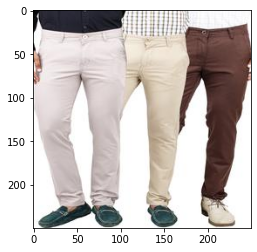

In [405]:
#Plotting one of test images 
Test_image = cv2.imread('/Users/jyotibhandari/Documents/Machine Learning /Project/Flipkart_images_final/'+ train_dataset[5])
Test_image = cv2.cvtColor(Test_image, cv2.COLOR_BGR2RGB)
plt.imshow(Test_image)
width = Test_image.shape[1]
hgt = Test_image.shape[0]
# displaying the dimensions
print(str(width) + "x" + str(hgt))

### Let's read and convert every images  into a numpy array of images by taking path of each images.

In [406]:
def image2array(file_array):

    """
    Reading and Converting images into numpy array by taking path of images.
    Arguments:
    file_array - (list) - list of file(path) names
    Returns:
    A numpy array of images. (np.ndarray)
    """

    image_array = []
    for path in tqdm(file_array):
        img = cv2.imread('/Users/jyotibhandari/Documents/Machine Learning /Project/Small dataset/Product images/'+path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224,224))
        image_array.append(np.array(img))
    image_array = np.array(image_array)
    image_array = image_array.reshape(image_array.shape[0], 224, 224, 3) 
    image_array = image_array.astype('float32')
    image_array /= 255 
    return np.array(image_array)


In [407]:
train_dataset

['4b91cffc68afbb6e55b8cb2e232d457a.jpg',
 '4b1388aed2b7af10cd0dd9a1b6a16d77.jpg',
 '4a34145211acc67bc2d452c9a2d93754.jpg',
 '4c915ff997c9934f1a9d34e95d0580c7.jpg',
 '3bcc76e2c96f0a0c316b6fc5d2ea5fdb.jpg',
 '3daa339bf4069aaf42f69ef7ba58b3e9.jpg',
 '4b93fb37b083bd5a4181e18361c88718.jpg',
 '3ad0b631f368f77adb7cdbf087de8aed.jpg',
 '04a8714cfbe28f100afca5f6510daa66.jpg',
 '04c75cb0e68bfc690550b045680a8aeb.jpg',
 '3ed7fac0b648d57444fdb88957155fc0.jpg',
 '4a12b1c352e323242dd80b678d83d6f1.jpg',
 '4a59458beff05b04a617a2f5494001dc.jpg',
 '4b53559ab6063f83b661e85491317836.jpg',
 '03c1097c43160b80538316cfd5972235.jpg',
 '4a9a516e2e41fb885a3250e3f0915db8.jpg',
 '4c6ccc602a9dab1311ba6c7e154fa7c8.jpg',
 '04cc7cd3ef5377fab2a9577ed0f09aba.jpg',
 '3f36123246dfd08bf956e86b6334d1e9.jpg',
 '4a9d5f6bc8a8c5b16df1821196f3a705.jpg',
 '4b4cfcf2a5360b1daade045486ec8100.jpg',
 '4c99adac7a7a6acc056815b08618ab48.jpg',
 '4a7c71d7d05edd192f5d9eb0d23b51ea.jpg',
 '3f4870495c61fc0eee0cb67243d0d39c.jpg',
 '4bc1635bd1d44f

In [578]:

train_data = image2array(train_dataset)
print("Length of training dataset:",train_data.shape)
test_data = image2array(test_dataset)
print("Length of test dataset:",test_data.shape)


/var/folders/2l/62z8hzq17zdcn66qy8xy_jp00000gn/T/ipykernel_3698/2298456650.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm(file_array):


  0%|          | 0/178 [00:00<?, ?it/s]

Length of training dataset: (178, 224, 224, 3)


  0%|          | 0/45 [00:00<?, ?it/s]

Length of test dataset: (45, 224, 224, 3)


In [579]:
keras_imager = tf.keras.preprocessing.image

In [580]:
train_images = tf.image.per_image_standardization(train_data)

In [581]:
test_images = tf.image.per_image_standardization(test_data)

## Let's make a Convolutional autoencoder model with the encoder and decoder. 

In [582]:
def encoder_decoder_model():
 
    #Encoder layers
    model = tf.keras.Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(224, 224, 3),padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
    model.add(Conv2D(128, kernel_size=(3, 3),strides=1,kernel_regularizer = tf.keras.regularizers.L2(0.001),activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',kernel_regularizer= tf.keras.regularizers.L2(0.001), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',kernel_regularizer= tf.keras.regularizers.L2(0.001), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2,padding='valid')
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
    
    #Decoder layers
    model.add(Conv2DTranspose(512, kernel_size=(3, 3), kernel_regularizer = tf.keras.regularizers.L2(0.001),activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2))
    model.add(Conv2DTranspose(512, kernel_size=(3, 3), kernel_regularizer = tf.keras.regularizers.L2(0.001), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2))
    model.add(Conv2DTranspose(256, kernel_size=(3, 3), kernel_regularizer = tf.keras.regularizers.L2(0.001), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2))
    model.add(Conv2DTranspose(128, kernel_size=(3, 3), activation='relu', kernel_regularizer = tf.keras.regularizers.L2(0.001), padding='same'))
    model.add(UpSampling2D((2, 2))
    model.add(Conv2DTranspose(64, kernel_size=(3, 3), activation='relu', kernel_regularizer = tf.keras.regularizers.L2(0.001), padding='same'))
    model.add(UpSampling2D((2, 2))
    model.add(Conv2D(3, kernel_size=(3, 3), padding='same',activation='sigmoid'))
    return model


### Let's make another autoencoder model i.e. ( encoder_decoder_model2)  with less layers for encoder and decoder. 

In [440]:
class encoder_decoder_model2(Model):
  def __init__(self):
    super(encoder_decoder_model2, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(224, 224, 3)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = encoder_decoder_model2()

In [443]:
autoencoder.compile(optimizer='adam', loss='mse')

In [444]:
autoencoder.fit(train_images, train_images,
                epochs=10,
                shuffle=True,
                validation_data=(test_images, test_images))

Epoch 1/10


2022-12-05 20:48:54.260075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 1.2429

2022-12-05 20:48:56.622735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 3s 279ms/step - loss: 1.2429 - val_loss: 1.2303
Epoch 2/10
5/5 [==============================] - 1s 103ms/step - loss: 1.2202 - val_loss: 1.1997
Epoch 3/10
5/5 [==============================] - 1s 144ms/step - loss: 1.1828 - val_loss: 1.1500
Epoch 4/10
5/5 [==============================] - 1s 137ms/step - loss: 1.1231 - val_loss: 1.0753
Epoch 5/10
5/5 [==============================] - 1s 127ms/step - loss: 1.0384 - val_loss: 0.9806
Epoch 6/10
5/5 [==============================] - 1s 126ms/step - loss: 0.9402 - val_loss: 0.8901
Epoch 7/10
5/5 [==============================] - 1s 124ms/step - loss: 0.8560 - val_loss: 0.8328
Epoch 8/10
5/5 [==============================] - 1s 128ms/step - loss: 0.8100 - val_loss: 0.8092
Epoch 9/10
5/5 [==============================] - 1s 122ms/step - loss: 0.7939 - val_loss: 0.8011
Epoch 10/10
5/5 [==============================] - 1s 124ms/step - loss: 0.7882 - val_loss: 0.7975


In [505]:
encoded_imgs = autoencoder.encoder(test_images).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [510]:
encoded_data = autoencoder.predict(test_images)

In [507]:
encoded_data.shape

(45, 224, 224, 3)

### Let's display the original and reconstructed images from the autoencoder model 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

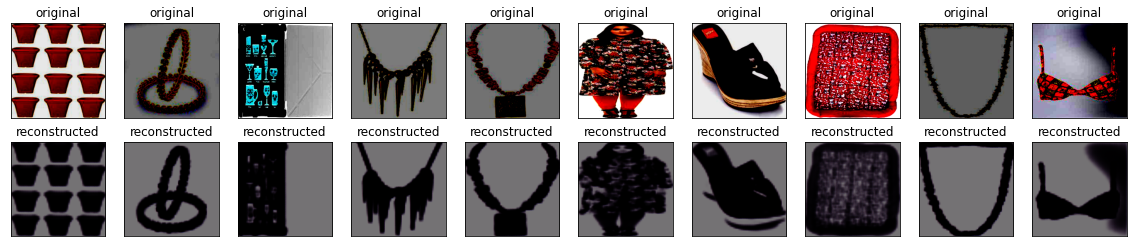

In [508]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # displaying original images
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(test_images[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # displaying reconstructed images
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

# Let's carry on with our first autoencoder model. 

In [583]:
model = encoder_decoder_model()
model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoding_Conv2D_1 (Conv2D)  (None, 224, 224, 64)      1792      
                                                                 
 Encoding_MaxPooling2D_1 (Ma  (None, 112, 112, 64)     0         
 xPooling2D)                                                     
                                                                 
 Encoding_Conv2D_2 (Conv2D)  (None, 112, 112, 128)     73856     
                                                                 
 Encoding_MaxPooling2D_2 (Ma  (None, 56, 56, 128)      0         
 xPooling2D)                                                     
                                                                 
 Encoding_Conv2D_3 (Conv2D)  (None, 56, 56, 256)       295168    
                                                                 
 Encoding_MaxPooling2D_3 (Ma  (None, 28, 28, 256)    

# Hyperparameter Tuning

In [570]:
#Let's take the learning rate of 0.01,0.001,0.0001,0.00001 and optimizers  Adagrad, Adam and Rmsprop to see which has minimum loss (MSE). 

parameters = {'Adagrad':[0.01,0.001,0.0001,0.00001],'Adam':[0.01,0.001,0.0001,0.00001],'Rmsprop':[0.01,0.001,0.0001,0.00001]}
result_list = []
for i in parameters.keys():
    print("{} as an optimizer:".format(i))
    values = parameters[i]
    result = []
    for learning_rate in values:
        print("\t\tUsing learning_rate: "+str(learning_rate))
        model = encoder_decoder_model()
        if i=='Adam':
            optimizer = Adam(learning_rate=learning_rate)
        elif i=='Adagrad':
            optimizer = Adagrad(learning_rate=learning_rate)
        else:
            optimizer = RMSprop(learning_rate=learning_rate)
         #compiling  the model 
        model.compile(optimizer=optimizer, loss='mse')            
        #fitting the model 
        model.fit(train_data, train_data, epochs=5, batch_size=32,validation_data=(test_data,test_data))  # fitting data
        result.append(model.history.history)         
    print()
    result_list.append(result)

Adagrad as an optimizer:
		Using learning_rate: 0.01
Epoch 1/5


2022-12-05 22:12:14.364082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 2.3745

2022-12-05 22:12:25.306595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 13s 2s/step - loss: 2.3745 - val_loss: 2.3679
Epoch 2/5
5/5 [==============================] - 11s 2s/step - loss: 2.3705 - val_loss: 2.3646
Epoch 3/5
5/5 [==============================] - 11s 2s/step - loss: 2.3672 - val_loss: 2.3612
Epoch 4/5
5/5 [==============================] - 11s 2s/step - loss: 2.3636 - val_loss: 2.3570
Epoch 5/5
5/5 [==============================] - 10s 2s/step - loss: 2.3591 - val_loss: 2.3524
		Using learning_rate: 0.001
Epoch 1/5


2022-12-05 22:13:09.487807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 2.3758

2022-12-05 22:13:20.569551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 13s 2s/step - loss: 2.3758 - val_loss: 2.3716
Epoch 2/5
5/5 [==============================] - 11s 2s/step - loss: 2.3754 - val_loss: 2.3712
Epoch 3/5
5/5 [==============================] - 10s 2s/step - loss: 2.3750 - val_loss: 2.3708
Epoch 4/5
5/5 [==============================] - 10s 2s/step - loss: 2.3745 - val_loss: 2.3703
Epoch 5/5
5/5 [==============================] - 10s 2s/step - loss: 2.3740 - val_loss: 2.3699
		Using learning_rate: 0.0001
Epoch 1/5


2022-12-05 22:14:04.618405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 2.3760

2022-12-05 22:14:15.493529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 13s 2s/step - loss: 2.3760 - val_loss: 2.3720
Epoch 2/5
5/5 [==============================] - 11s 2s/step - loss: 2.3759 - val_loss: 2.3720
Epoch 3/5
5/5 [==============================] - 24s 6s/step - loss: 2.3759 - val_loss: 2.3719
Epoch 4/5
5/5 [==============================] - 11s 2s/step - loss: 2.3758 - val_loss: 2.3719
Epoch 5/5
5/5 [==============================] - 11s 2s/step - loss: 2.3758 - val_loss: 2.3718
		Using learning_rate: 1e-05
Epoch 1/5


2022-12-05 22:15:15.977225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 2.3760

2022-12-05 22:15:28.473598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 14s 2s/step - loss: 2.3760 - val_loss: 2.3720
Epoch 2/5
5/5 [==============================] - 11s 2s/step - loss: 2.3760 - val_loss: 2.3720
Epoch 3/5
5/5 [==============================] - 11s 2s/step - loss: 2.3760 - val_loss: 2.3720
Epoch 4/5
5/5 [==============================] - 10s 2s/step - loss: 2.3760 - val_loss: 2.3720
Epoch 5/5
5/5 [==============================] - 11s 2s/step - loss: 2.3759 - val_loss: 2.3720

Adam as an optimizer:
		Using learning_rate: 0.01
Epoch 1/5


2022-12-05 22:16:13.109684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 1.1315

2022-12-05 22:16:24.845600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 14s 2s/step - loss: 1.1315 - val_loss: 0.7417
Epoch 2/5
5/5 [==============================] - 11s 2s/step - loss: 0.6320 - val_loss: 0.8437
Epoch 3/5
5/5 [==============================] - 11s 2s/step - loss: 0.6438 - val_loss: 0.7866
Epoch 4/5
5/5 [==============================] - 11s 2s/step - loss: 0.8112 - val_loss: 0.8295
Epoch 5/5
5/5 [==============================] - 11s 2s/step - loss: 0.8046 - val_loss: 0.7403
		Using learning_rate: 0.001
Epoch 1/5


2022-12-05 22:17:10.872776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 2.0882

2022-12-05 22:17:22.867367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 14s 2s/step - loss: 2.0882 - val_loss: 1.6101
Epoch 2/5
5/5 [==============================] - 11s 2s/step - loss: 1.4023 - val_loss: 1.0349
Epoch 3/5
5/5 [==============================] - 11s 2s/step - loss: 0.8970 - val_loss: 0.6692
Epoch 4/5
5/5 [==============================] - 11s 2s/step - loss: 0.5861 - val_loss: 0.4603
Epoch 5/5
5/5 [==============================] - 11s 2s/step - loss: 0.4132 - val_loss: 0.3507
		Using learning_rate: 0.0001
Epoch 1/5


2022-12-05 22:18:10.636854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 2.3385

2022-12-05 22:18:22.130935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 15s 2s/step - loss: 2.3385 - val_loss: 2.2392
Epoch 2/5
5/5 [==============================] - 11s 2s/step - loss: 2.2181 - val_loss: 2.1437
Epoch 3/5
5/5 [==============================] - 11s 2s/step - loss: 2.1237 - val_loss: 2.0583
Epoch 4/5
5/5 [==============================] - 11s 2s/step - loss: 2.0308 - val_loss: 1.9714
Epoch 5/5
5/5 [==============================] - 10s 2s/step - loss: 1.9456 - val_loss: 1.8838
		Using learning_rate: 1e-05
Epoch 1/5


2022-12-05 22:19:06.647138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 2.3719

2022-12-05 22:19:18.477714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 14s 2s/step - loss: 2.3719 - val_loss: 2.3597
Epoch 2/5
5/5 [==============================] - 11s 2s/step - loss: 2.3597 - val_loss: 2.3474
Epoch 3/5
5/5 [==============================] - 11s 2s/step - loss: 2.3469 - val_loss: 2.3339
Epoch 4/5
5/5 [==============================] - 10s 2s/step - loss: 2.3330 - val_loss: 2.3189
Epoch 5/5
5/5 [==============================] - 11s 2s/step - loss: 2.3172 - val_loss: 2.3021

Rmsprop as an optimizer:
		Using learning_rate: 0.01
Epoch 1/5


2022-12-05 22:20:03.882115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 1.7202

2022-12-05 22:20:17.977573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 16s 3s/step - loss: 1.7202 - val_loss: 0.2077
Epoch 2/5
5/5 [==============================] - 12s 2s/step - loss: 0.6246 - val_loss: 0.4900
Epoch 3/5
5/5 [==============================] - 11s 2s/step - loss: 0.4437 - val_loss: 0.3205
Epoch 4/5
5/5 [==============================] - 11s 2s/step - loss: 0.3332 - val_loss: 0.7843
Epoch 5/5
5/5 [==============================] - 11s 2s/step - loss: 0.5747 - val_loss: 0.6067
		Using learning_rate: 0.001
Epoch 1/5


2022-12-05 22:21:05.143814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 1.7300

2022-12-05 22:21:19.216316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 16s 3s/step - loss: 1.7300 - val_loss: 0.9450
Epoch 2/5
5/5 [==============================] - 12s 2s/step - loss: 0.7808 - val_loss: 0.5090
Epoch 3/5
5/5 [==============================] - 12s 2s/step - loss: 0.4991 - val_loss: 0.4032
Epoch 4/5
5/5 [==============================] - 11s 2s/step - loss: 0.3611 - val_loss: 0.3064
Epoch 5/5
5/5 [==============================] - 11s 2s/step - loss: 0.2678 - val_loss: 0.2600
		Using learning_rate: 0.0001
Epoch 1/5


2022-12-05 22:22:07.740264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 2.2789

2022-12-05 22:22:21.442350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 16s 3s/step - loss: 2.2789 - val_loss: 2.1262
Epoch 2/5
5/5 [==============================] - 12s 2s/step - loss: 2.0967 - val_loss: 2.0192
Epoch 3/5
5/5 [==============================] - 11s 2s/step - loss: 1.9831 - val_loss: 1.9270
Epoch 4/5
5/5 [==============================] - 11s 2s/step - loss: 1.8828 - val_loss: 1.8931
Epoch 5/5
5/5 [==============================] - 11s 2s/step - loss: 1.8218 - val_loss: 1.7582
		Using learning_rate: 1e-05
Epoch 1/5


2022-12-05 22:23:11.621486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 2.3650

2022-12-05 22:23:26.369222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 19s 3s/step - loss: 2.3650 - val_loss: 2.3434
Epoch 2/5
5/5 [==============================] - 12s 2s/step - loss: 2.3396 - val_loss: 2.3206
Epoch 3/5
5/5 [==============================] - 11s 2s/step - loss: 2.3160 - val_loss: 2.2959
Epoch 4/5
5/5 [==============================] - 12s 2s/step - loss: 2.2923 - val_loss: 2.2775
Epoch 5/5
5/5 [==============================] - 11s 2s/step - loss: 2.2752 - val_loss: 2.2624



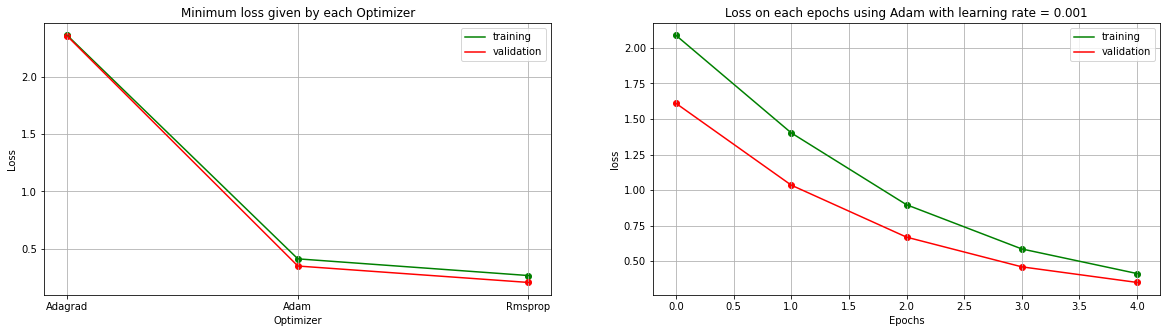

In [599]:
min_train = []; min_val = []  
rates = list(parameters.keys())
epochs = [0,1,2,3,4]
for i in result:
    train = []; val = []
    for j in i:
        train.append(min(j['loss'])); val.append(min(j['val_loss']))  # taking minimum loss of each optimizer over all learning rates.
    min_train.append(min(train)); min_val.append(min(val))
plt.figure(figsize=(20,5))
plot_(rates,min_train,min_val,1,2,1,'Minimum loss given by each Optimizer','Optimizer','Loss','training',False,'r')
# plotting the result of adam with learning rate = 0.001 .
plot_(epochs, result[1][1]['loss'],result[1][1]['val_loss'],1,2,2,'Loss on each epochs using Adam with learning rate = 0.001','Epochs','loss','training',False,'r')
plt.show()


### As seen in the figure above RSmprop with learning rate 0.001 performs better but when training with the whole data, the  Adam optimizer with learning_rate=0.001 works better. So, let's train the model and fit the training images. 

In [592]:
optimizer = Adam(learning_rate=0.001) 
model = encoder_decoder_model() 
model.compile(optimizer=optimizer, loss='mse') 
early_stopping = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=6,min_delta=0.0001) 
checkpoint = ModelCheckpoint('/Users/jyotibhandari/Documents/Machine Learning /Project/model/model_encoder.h5', monitor='val_loss', mode='min', save_best_only=True) 
model.fit(train_images,train_images , epochs=150, batch_size=128,validation_data=(test_images,test_images),callbacks=[early_stopping,checkpoint]) 


Epoch 1/150


2022-12-05 22:48:44.107285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 3.3592 

2022-12-05 22:49:00.629064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 19s 6s/step - loss: 3.3592 - val_loss: 3.1551
Epoch 2/150
2/2 [==============================] - 17s 5s/step - loss: 3.0759 - val_loss: 2.6818
Epoch 3/150
2/2 [==============================] - 16s 5s/step - loss: 2.6545 - val_loss: 2.4689
Epoch 4/150
2/2 [==============================] - 15s 5s/step - loss: 2.4403 - val_loss: 2.2533
Epoch 5/150
2/2 [==============================] - 15s 5s/step - loss: 2.2232 - val_loss: 2.0800
Epoch 6/150
2/2 [==============================] - 15s 5s/step - loss: 2.0325 - val_loss: 1.8625
Epoch 7/150
2/2 [==============================] - 15s 5s/step - loss: 1.8375 - val_loss: 1.7595
Epoch 8/150
2/2 [==============================] - 15s 5s/step - loss: 1.7230 - val_loss: 1.6066
Epoch 9/150
2/2 [==============================] - 15s 5s/step - loss: 1.5957 - val_loss: 1.4846
Epoch 10/150
2/2 [==============================] - 15s 5s/step - loss: 1.4762 - val_loss: 1.3931
Epoch 11/150
2/2 [=======================

In [604]:

model = load_model("/Users/jyotibhandari/Documents/Machine Learning /Project/model/model_encoder.h5")
model.compile(optimizer=optimizer, loss='mse') 

2022-12-05 23:53:02.926134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


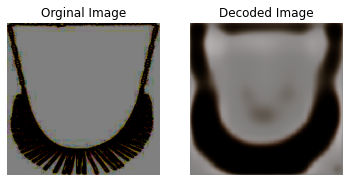

In [605]:

sample_image = train_images[8]
sample_image = np.expand_dims(sample_image,axis=0)
image = model.predict(sample_image)
plot_(sample_image[0,:,:,:],'','',1,2,1,"Orginal Image","","","",True)
plot_(image[0,:,:],'','',1,2,2,"Decoded Image","","","",True)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


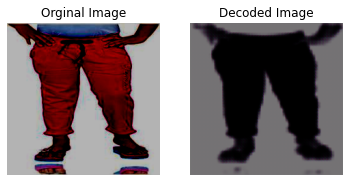

In [1028]:
plot_(test_images[19],'','',1,2,1,"Orginal Image","","","",True)
plot_(decoded_imgs[19],'','',1,2,2,"Decoded Image","","","",True)
plt.show()

In [1039]:
encoded = K.function([autoencoder.decoder.layers[0].input],[autoencoder.decoder.layers[2].output])

In [1118]:
from keras import backend as K
def feature_extraction(model, data, layer ):

    """
    Creating a function to run the initial layers of the encoder model. (to get feature extraction from any layer of the model)
    Arguments:
    model - (Auto encoder model) - Trained model
    data - (np.ndarray) - list of images to get feature extraction from trained model
    layer - (int) - from which layer to take the features(by default = 4)
    Returns:
    pooled_array - (np.ndarray) - array of extracted features of given images
    """

    encoded = K.function([model.layers[0].input],[model.layers[layer].output])
    encoded_array = encoded([data])[0]
    pooled_array = encoded_array.max(axis=-1)
    return encoded_array
encoded = feature_extraction(model,train_images[:10],7)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


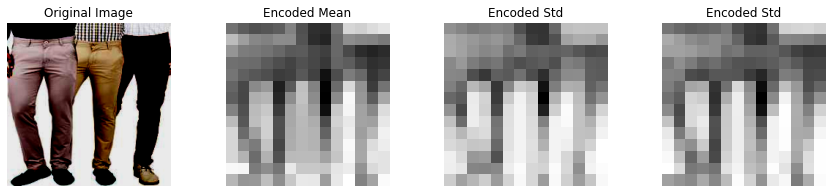

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


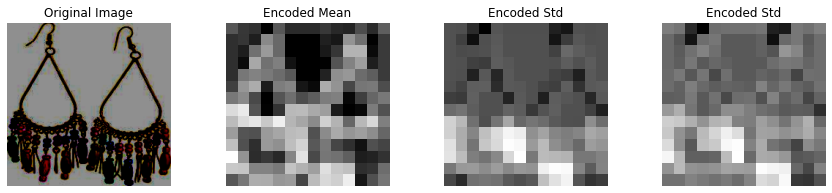

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


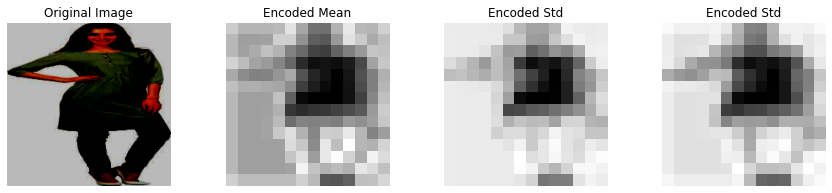

In [1119]:
for index in [5,7,9]:   # 3 random images
    plt.figure(figsize=(15,3))
    plot_(train_images[index],'','',1,4,1,"Original Image","","",'',True)
    plot_(encoded[index].mean(axis=-1),'','',1,4,2,"Encoded Mean","","",'',True)
    plot_(encoded[index].max(axis=-1),'','',1,4,3,"Encoded Std","","",'',True)
    plot_(encoded[index].std(axis=-1),'','',1,4,4,"Encoded Std","","",'',True)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


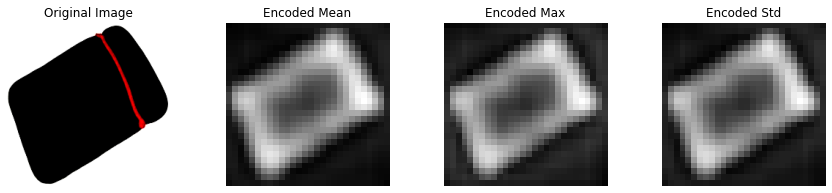

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


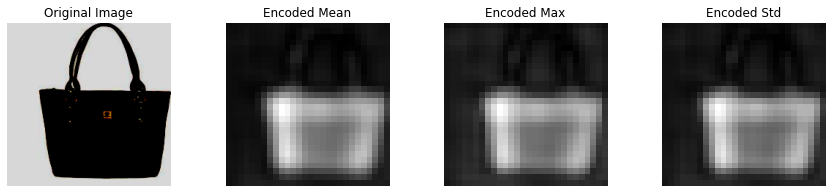

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


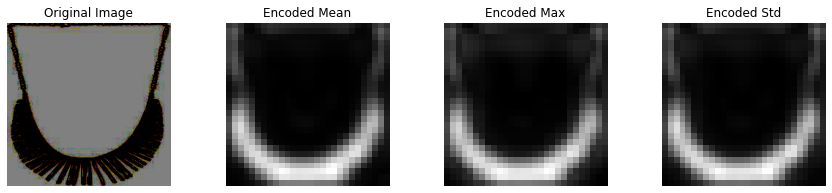

In [1121]:

encoded = feature_extraction(model,train_images[:10],14)
for index in [6,4,8]:   # 3 random images
    plt.figure(figsize=(15,3))
    plot_(train_images[index],'','',1,4,1,"Original Image","","",'',True)
    plot_(encoded[index].mean(axis=-1),'','',1,4,2,"Encoded Mean","","",'',True)
    plot_(encoded[index].max(axis=-1),'','',1,4,3,"Encoded Max","","",'',True)
    plot_(encoded[index].std(axis=-1),'','',1,4,4,"Encoded Std","","",'',True)
    plt.show()


In [1122]:
def get_batches(data, batch_size=1000):

    """
    Taking batch of images for extraction of images.
    Arguments:
    data - (np.ndarray or list) - list of image array to get extracted features.
    batch_size - (int) - Number of images per each batch
    Returns:
    list - extracted features of each images
    """

    if len(data) < batch_size:
        return [data]
    n_batches = len(data) // batch_size
    
    # If batches fit exactly into the size of df.
    if len(data) % batch_size == 0:
        return [data[i*batch_size:(i+1)*batch_size] for i in range(n_batches)]   

    # If there is a remainder.
    else:
        return [data[i*batch_size:min((i+1)*batch_size, len(data))] for i in range(n_batches+1)]


In [1123]:
d = np.concatenate([train_images,test_images],axis=0)
d.shape

(223, 224, 224, 3)

In [1124]:
X_encoded = []
i=0
# Iterate through the full training set.
for batch in get_batches(d, batch_size=300):
    i+=1
    # This line runs our pooling function on the model for each batch.
    X_encoded.append(feature_extraction(model, batch,14))
    
X_encoded = np.concatenate(X_encoded)


In [1125]:
encoded_data.shape 

(45, 224, 224, 3)

In [1126]:
X_encoded_reshape = X_encoded.reshape(X_encoded.shape[0], X_encoded.shape[1]*X_encoded.shape[2]*X_encoded.shape[3])
print('Encoded shape:', X_encoded_reshape.shape)


Encoded shape: (223, 200704)


In [1127]:
lisp= train_dataset
lisp.extend(test_dataset)
print(len(lisp))

493


In [1128]:
#Dimenionality reduction
transform = TSNE 
trans = transform(n_components=2) 
values = trans.fit_transform(X_encoded_reshape) 

/Users/jyotibhandari/tensorflow-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jyotibhandari/tensorflow-metal/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [1129]:
#Training the model with optimial K value (6 in our case)
kmeans = KMeans(n_clusters = 4, random_state=444).fit(X_encoded_reshape)
labels=kmeans.labels_
centroids = kmeans.cluster_centers_


In [1130]:
kmeans_file = '/Users/jyotibhandari/Documents/Machine Learning /Project/model/kmeans_model.pkl'
joblib.dump(kmeans,kmeans_file)

['/Users/jyotibhandari/Documents/Machine Learning /Project/model/kmeans_model.pkl']

In [1131]:
clusters_features = []
cluster_files=[]
for i in [0,1,2,3,4,5]:
    i_cluster = []
    i_labels=[]
    for iter,j in enumerate(kmeans.labels_):
        if j==i:
            i_cluster.append(X_encoded_reshape[iter])
            i_labels.append(lisp[iter])
    i_cluster = np.array(i_cluster)
    clusters_features.append(i_cluster)
    cluster_files.append(i_labels)

In [1132]:
labels=[]
data=[]
files=[]
for iter,i in enumerate(clusters_features):
    data.extend(i)
    labels.extend([iter for i in range(i.shape[0])])
    files.extend(cluster_files[iter])
print(np.array(labels).shape)
print(np.array(data).shape)
print(np.array(files).shape)


(223,)
(223, 200704)
(223,)


In [1133]:
knn = KNeighborsClassifier(n_neighbors=7,algorithm='ball_tree',n_jobs=-1)
knn.fit(np.array(data),np.array(labels))


KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=7)

In [1134]:
knn_file = '/Users/jyotibhandari/Documents/Machine Learning /Project/model/knn_model.pkl'
joblib.dump(knn,knn_file)


['/Users/jyotibhandari/Documents/Machine Learning /Project/model/knn_model.pkl']

In [1135]:
def results_(query,result):
    
    """
    Plotting the N similar images from the dataset with query image.
    Arguments:
    query - (string) - filename of the query image
    result - (list) - filenames of similar images
    """

    def read(img):
        image = cv2.imread('/Users/jyotibhandari/Documents/Machine Learning /Project/Flipkart_images_final/'+img)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        return image
    plt.figure(figsize=(10,5))
    if type(query)!=type(30):
        plot_(query,"","",1,1,1,"Query Image","","","",True)
    else:
        plot_(read(files[query]),"","",1,1,1,"Query Image "+files[query],"","","",True)
    plt.show()
    plt.figure(figsize=(20,5))
    for iter,i in enumerate(result):
        plot_(read(files[i]),"","",1,len(result),iter+1,files[i],"","","",True)
    plt.show()

In [1136]:
data[15]

array([0.00871566, 0.14247908, 0.        , ..., 0.        , 0.        ,
       0.        ], dtype=float32)

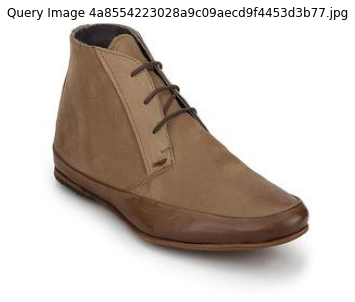

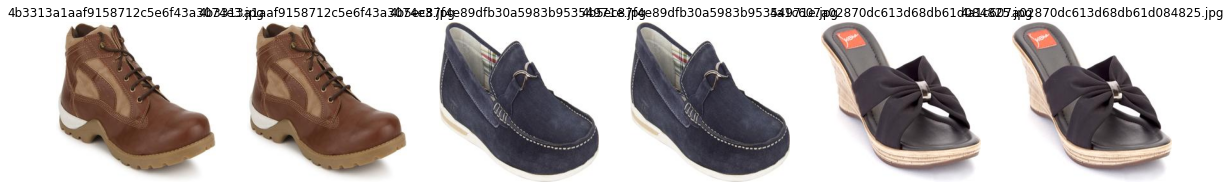

In [1137]:
num = 55 #datapoint
res = knn.kneighbors(data[num].reshape(1,-1),return_distance=True,n_neighbors=7)
results_(num,list(res[1][0])[1:])

### Lets use the pretrained VGG16 which is a convolutional neural network that is 16 layers deep to see the difference in the image prediction. 

In [1167]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import os

In [1168]:
#Make a feature extractor class that contains the base model of VGG16 , 

class Feature_Extractor:
    def __init__(self):
        
        # Using the VGG-16 as the model/architecture and ImageNet as the weight
        basicmodel = VGG16(weights='imagenet')
        
        # Customizing the model for returning the features from a fully-connected layer
        self.model = Model(inputs=basicmodel.input, outputs=basicmodel.get_layer('fc1').output)
    
    def extract_image(self, img_file):
        # Resizing the image
        img_file = img_file.resize((224, 224))
        # Converting the image color space
        img_file = img_file.convert('RGB')
        # Reformatting the image by converting the image to array and preprocessing the image
        img_array = image.img_to_array(img_file)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        # Extract Features
        feature = self.model.predict(img_array)[0]
        return feature / np.linalg.norm(feature)

f_e = Feature_Extractor()

# Iterating through the input images 
for img_path in tqdm(os.listdir("/Users/jyotibhandari/Documents/Machine Learning /Project/Flipkart_images_final")):
    # Extracting the  Features
    feature = f_e.extract_image(Image.open('/Users/jyotibhandari/Documents/Machine Learning /Project/Flipkart_images_final/' + str(img_path)))
    # Saving the Numpy array (.npy) on the designated path
    feature_path = "features/{}.npy".format(str(img_path).replace('.jpg',''))
    np.save(feature_path, feature)
     

/var/folders/2l/62z8hzq17zdcn66qy8xy_jp00000gn/T/ipykernel_3698/2394019765.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_path in tqdm(os.listdir("/Users/jyotibhandari/Documents/Machine Learning /Project/Flipkart_images_final")):


  0%|          | 0/18328 [00:00<?, ?it/s]

2022-12-07 11:14:34.390775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [1169]:

# Let us Build a features DataFrame
features = []
for feature in tqdm(os.listdir("features")):
  add_feature = np.load("features/" + str(feature))
  add_feature = pd.DataFrame([add_feature])
  add_feature['image'] = feature.replace('.npy','.jpg')

  features.append(add_feature)

features = pd.concat(features, axis=0)
features.to_csv('feature_extraction.csv', index=False)

/var/folders/2l/62z8hzq17zdcn66qy8xy_jp00000gn/T/ipykernel_3698/140462119.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for feature in tqdm(os.listdir("features")):


  0%|          | 0/18328 [00:00<?, ?it/s]

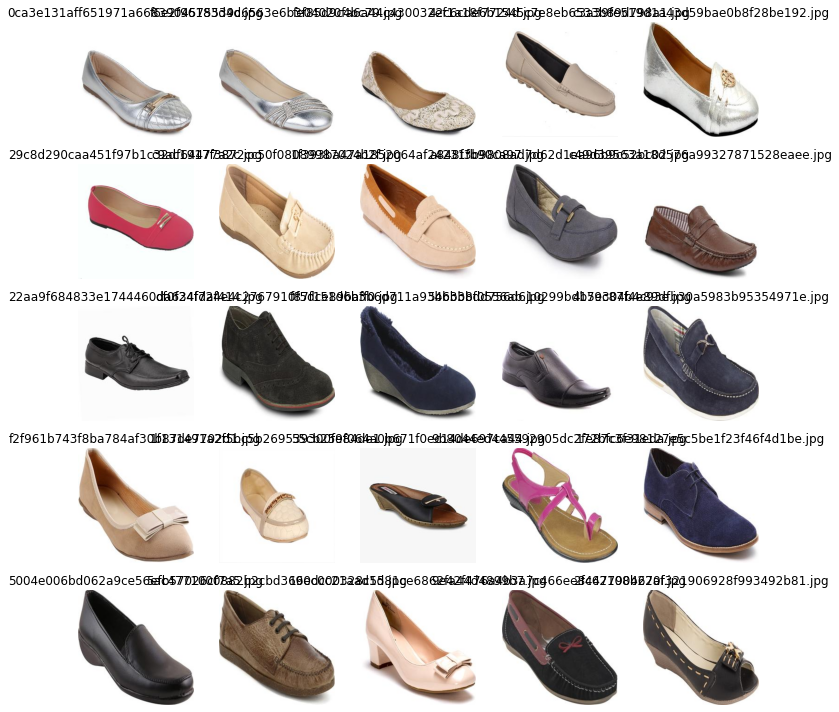

In [1170]:
# Insert the image 
img = Image.open("/Users/jyotibhandari/Documents/Machine Learning /Project/Flipkart_images_final/0ca3e131aff651971a6683904575539c.jpg")
# Extract the image's features using the extract function from Feature_Extractor class
query = f_e.extract_image(img)
# Calculate the  distance (similarity) between the images based on the features
features_data = features.copy()
features_data = features_data.drop(columns = ['image'])
features_data = features_data.values
distance = np.linalg.norm(features_data - query, axis=1)

# Extract 20 images that have lowest distance
ids = np.argsort(distance)[:30]
similar_imgs = features.iloc[ids,:]['image']
scores = pd.DataFrame({'image': similar_imgs,
                       'img_distance': distance[ids]})
scores = scores.reset_index(drop=True)

# Visualizing the similar product
axes=[]
fig=plt.figure(figsize=(10,10))
for i in range(5*5):
    score = scores['img_distance'][i]
    axes.append(fig.add_subplot(5, 5, i+1))
    subplot_title=str(scores['image'][i])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open('/Users/jyotibhandari/Documents/Machine Learning /Project/Flipkart_images_final/' + scores['image'][i]))
fig.tight_layout()
plt.show()